In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error, accuracy_score, classification_report, confusion_matrix, log_loss
from math import sqrt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.cluster import KMeans, k_means
from sklearn.dummy import DummyClassifier

np.set_printoptions(formatter = {'float_kind':'{:f}'.format})

%matplotlib inline

In [4]:
raw_data = pd.read_csv('C:\\Users\ASHE\\Documents\\ML\\Output Data.csv')
raw_data

,customer,age,gender,postcode,district,constituency,latitude,longitude,current_status,total_household_income,...,Distance from Event,Clusters,Clusters Category,Household Income Order,Social Media Time Spend Order,food_areas_coffee_areas_bars_toilets Agree Order,enjoy_adrenaline_rush_activities Agree Order,Satisfied Agree Order,Value_for_money Agree Order,Recommend Order
0,0,1,40-49,Female,AL9 7BN,Welwyn Hatfield,Welwyn Hatfield,51.727429,-0.183648,Married with children,...,0.1657,34.342502,2,Cluster 3,4,2,1,7,3,5
1,1,2,60-64,Male,AL7 1ZW,Welwyn Hatfield,Welwyn Hatfield,51.804482,-0.195898,Married with children,...,0.1657,41.376761,0,Cluster 1,3,2,1,5,2,7
2,2,3,50-59,Male,AB4 5JX,Aberdeenshire,Banff and Buchan,57.692200,-2.022295,Married with children,...,0.1657,701.484783,0,Cluster 1,5,1,3,5,2,7
3,3,4,50-59,Female,B24 0DL,Birmingham,"Birmingham, Erdington",52.526595,-1.822211,Married without children,...,0.1657,176.943286,1,Cluster 2,3,4,4,1,3,5
4,4,5,60-64,Male,E17 5QP,Waltham Forest,Walthamstow,51.593979,-0.040803,Married with children,...,0.1657,17.216110,4,Cluster 5,6,2,4,6,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14773,14778,16262,40-49,Male,AB23 8JT,Aberdeen City,Gordon,57.203497,-2.096799,Married with children,...,0.1657,649.631752,4,Cluster 5,6,1,1,5,1,1
14774,14779,16263,21-25,Male,CV34 5JN,Warwick,Warwick and Leamington,52.297782,-1.588626,"Single, never married",...,0.1657,148.937948,0,Cluster 1,1,3,7,4,2,3
14775,14780,16264,40-49,Male,CM8 1FU,Braintree,Witham,51.789173,0.624822,Living with partner,...,0.1657,44.534359,2,Cluster 3,6,2,7,3,2,4
14776,14781,16266,50-59,Male,DD8 3JF,Angus,Angus,56.648815,-2.895498,Married with children,...,0.1657,605.051202,4,Cluster 5,6,1,1,5,1,1


In [5]:
raw_data.isnull().sum()

customer                                                       0
age                                                            0
gender                                                         0
postcode                                                       0
district                                                       0
constituency                                                   0
latitude                                                       0
longitude                                                      0
current_status                                                 0
total_household_income                                         0
how_often_you_attend_entertaining_events_in_a_year             0
social_media                                                   0
how_many_hours_are_you_willing_to_travel_to_attend_an_event    0
do_you_enjoy_adrenaline_rush_activities                        0
are_food_areas_coffee_areas_bars_toilets_important_to_you      0
what_is_your_favourite_at

In [8]:
for column in raw_data:
    unique_vals = np.unique(raw_data[column])
    nr_values = len(unique_vals)
    if nr_values < 10:
        print('The number of values of feature {} is {} -- {}'.format(column, nr_values, unique_vals))
    else:
        print('The number of values of feature {} is {}'.format(column, nr_values))

The number of values of feature customer is 14778
The number of values of feature age is 14778
The number of values of feature gender is 9 -- ['17 or younger' '18-20' '21-25' '26-32' '33-39' '40-49' '50-59' '60-64'
 '65 or older']
The number of values of feature postcode is 2 -- ['Female' 'Male']
The number of values of feature district is 14674
The number of values of feature constituency is 225
The number of values of feature latitude is 358
The number of values of feature longitude is 13242
The number of values of feature current_status is 13262
The number of values of feature total_household_income is 8 -- ['Divorced' 'Living with partner' 'Married with children'
 'Married without children' 'Separated' 'Single, never married'
 'Step parent' 'Widowed']
The number of values of feature how_often_you_attend_entertaining_events_in_a_year is 8 -- ['100,000 to 149,999' '150,000 to 199,999' '20,000 to 34,999'
 '200,000 or more' '35,000 to 49,999' '50,000 to 74,999'
 '75,000 to 99,999' 'Les

In [2]:
raw_data = pd.read_csv('C:\\Users\ASHE\\Documents\\ML\\k means.csv')
raw_data

,CUSTOMER,Age,Gender,Postcode,District,Constituency,latitude,longitude,Current_Status,Total_Household_Income,How often you attend Entertaining events in a year?,Social_Media,How many hours are you willing to travel to attend an event?,Do you enjoy adrenaline-rush activities?,"Are food areas, coffee areas, bars & toilets important to you?",What is your favourite attraction from below:,Were you satisfied with the last event you attended with us?,Would you recommend our events to other people?,Did you find our events value for money?
0,1,40-49,Female,AL9 7BN,Welwyn Hatfield,Welwyn Hatfield,51.727429,-0.183648,Married with children,"50,000 to 74,999",4 Times a Year,Up to 1 hour,3 hours,Entirely disagree,Entirely agree,Ice Bar,Somewhat agree,Somewhat Unlikely,Somewhat disagree
1,2,60-64,Male,AL7 1ZW,Welwyn Hatfield,Welwyn Hatfield,51.804482,-0.195898,Married with children,"35,000 to 49,999",3 Times a Year,Up to 1 hour,5 hours,Somewhat disagree,Entirely agree,Happy Rollercoaster,Mostly agree,Somewhat Likely,Entirely disagree
2,3,50-59,Male,AB4 5JX,Aberdeenshire,Banff and Buchan,57.692200,-2.022295,Married with children,"75,000 to 99,999",3 Times a Year,I don't spend any time at all,5 hours,Somewhat disagree,Somewhat agree,Happy Rollercoaster,Mostly agree,Mostly Unlikely,Entirely disagree
3,4,50-59,Female,B24 0DL,Birmingham,"Birmingham, Erdington",52.526595,-1.822211,Married without children,"35,000 to 49,999",1 Times a Year,Half a day,1 hour,Entirely agree,Neither agree nor disagree,Crazy rollercoaster ride,Somewhat agree,Somewhat Likely,Somewhat disagree
4,5,60-64,Male,E17 5QP,Waltham Forest,Walthamstow,51.593979,-0.040803,Married with children,"100,000 to 149,999",3 Times a Year,Up to 1 hour,6 hours plus,Mostly disagree,Neither agree nor disagree,Kids Playground,Entirely agree,Very Unlikely,Entirely agree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14778,16262,40-49,Male,AB23 8JT,Aberdeen City,Gordon,57.203497,-2.096799,Married with children,"100,000 to 149,999",3 Times a Year,I don't spend any time at all,4 hours,Somewhat disagree,Entirely agree,Kids Playground,Entirely agree,Very Unlikely,Entirely agree
14779,16263,21-25,Male,CV34 5JN,Warwick,Warwick and Leamington,52.297782,-1.588626,"Single, never married","Less than 20,000",4 Times a Year,Up to 2 hours,3 hours,Neither agree nor disagree,Entirely disagree,Wooden Bar,Mostly agree,Mostly Likely,Somewhat agree
14780,16264,40-49,Male,CM8 1FU,Braintree,Witham,51.789173,0.624822,Living with partner,"100,000 to 149,999",4 Times a Year,Up to 1 hour,3 hours,Somewhat agree,Entirely disagree,Ice Bar,Mostly agree,Somewhat Likely,Neither agree nor disagree
14781,16266,50-59,Male,DD8 3JF,Angus,Angus,56.648815,-2.895498,Married with children,"100,000 to 149,999",3 Times a Year,I don't spend any time at all,4 hours,Somewhat disagree,Entirely agree,Kids Playground,Entirely agree,Very Unlikely,Entirely agree


In [3]:
raw_data.isnull().sum()

CUSTOMER                                                          0
Age                                                               0
Gender                                                            0
Postcode                                                          0
District                                                          0
Constituency                                                      0
latitude                                                          0
longitude                                                         0
Current_Status                                                    0
Total_Household_Income                                            5
How often you attend Entertaining events in a year?               5
Social_Media                                                      5
How many hours are you willing to travel to attend an event?      5
Do you enjoy adrenaline-rush activities?                          5
Are food areas, coffee areas, bars & toilets imp

In [4]:
raw_data[raw_data['Social_Media'].isnull()]

,CUSTOMER,Age,Gender,Postcode,District,Constituency,latitude,longitude,Current_Status,Total_Household_Income,How often you attend Entertaining events in a year?,Social_Media,How many hours are you willing to travel to attend an event?,Do you enjoy adrenaline-rush activities?,"Are food areas, coffee areas, bars & toilets important to you?",What is your favourite attraction from below:,Were you satisfied with the last event you attended with us?,Would you recommend our events to other people?,Did you find our events value for money?
21,23,50-60,Female,EN3 4YQ,Enfield,Edmonton,51.643546,-0.029532,Married with children,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,24,50-61,Female,EN3 4YQ,Enfield,Edmonton,51.643546,-0.029532,Married with children,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,25,50-62,Female,EN3 4YQ,Enfield,Edmonton,51.643546,-0.029532,Married with children,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,26,50-63,Female,EN3 4YQ,Enfield,Edmonton,51.643546,-0.029532,Married with children,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,27,50-64,Female,EN3 4YQ,Enfield,Edmonton,51.643546,-0.029532,Married with children,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
raw_data.dropna(subset = ['Social_Media'])

,CUSTOMER,Age,Gender,Postcode,District,Constituency,latitude,longitude,Current_Status,Total_Household_Income,How often you attend Entertaining events in a year?,Social_Media,How many hours are you willing to travel to attend an event?,Do you enjoy adrenaline-rush activities?,"Are food areas, coffee areas, bars & toilets important to you?",What is your favourite attraction from below:,Were you satisfied with the last event you attended with us?,Would you recommend our events to other people?,Did you find our events value for money?
0,1,40-49,Female,AL9 7BN,Welwyn Hatfield,Welwyn Hatfield,51.727429,-0.183648,Married with children,"50,000 to 74,999",4 Times a Year,Up to 1 hour,3 hours,Entirely disagree,Entirely agree,Ice Bar,Somewhat agree,Somewhat Unlikely,Somewhat disagree
1,2,60-64,Male,AL7 1ZW,Welwyn Hatfield,Welwyn Hatfield,51.804482,-0.195898,Married with children,"35,000 to 49,999",3 Times a Year,Up to 1 hour,5 hours,Somewhat disagree,Entirely agree,Happy Rollercoaster,Mostly agree,Somewhat Likely,Entirely disagree
2,3,50-59,Male,AB4 5JX,Aberdeenshire,Banff and Buchan,57.692200,-2.022295,Married with children,"75,000 to 99,999",3 Times a Year,I don't spend any time at all,5 hours,Somewhat disagree,Somewhat agree,Happy Rollercoaster,Mostly agree,Mostly Unlikely,Entirely disagree
3,4,50-59,Female,B24 0DL,Birmingham,"Birmingham, Erdington",52.526595,-1.822211,Married without children,"35,000 to 49,999",1 Times a Year,Half a day,1 hour,Entirely agree,Neither agree nor disagree,Crazy rollercoaster ride,Somewhat agree,Somewhat Likely,Somewhat disagree
4,5,60-64,Male,E17 5QP,Waltham Forest,Walthamstow,51.593979,-0.040803,Married with children,"100,000 to 149,999",3 Times a Year,Up to 1 hour,6 hours plus,Mostly disagree,Neither agree nor disagree,Kids Playground,Entirely agree,Very Unlikely,Entirely agree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14778,16262,40-49,Male,AB23 8JT,Aberdeen City,Gordon,57.203497,-2.096799,Married with children,"100,000 to 149,999",3 Times a Year,I don't spend any time at all,4 hours,Somewhat disagree,Entirely agree,Kids Playground,Entirely agree,Very Unlikely,Entirely agree
14779,16263,21-25,Male,CV34 5JN,Warwick,Warwick and Leamington,52.297782,-1.588626,"Single, never married","Less than 20,000",4 Times a Year,Up to 2 hours,3 hours,Neither agree nor disagree,Entirely disagree,Wooden Bar,Mostly agree,Mostly Likely,Somewhat agree
14780,16264,40-49,Male,CM8 1FU,Braintree,Witham,51.789173,0.624822,Living with partner,"100,000 to 149,999",4 Times a Year,Up to 1 hour,3 hours,Somewhat agree,Entirely disagree,Ice Bar,Mostly agree,Somewhat Likely,Neither agree nor disagree
14781,16266,50-59,Male,DD8 3JF,Angus,Angus,56.648815,-2.895498,Married with children,"100,000 to 149,999",3 Times a Year,I don't spend any time at all,4 hours,Somewhat disagree,Entirely agree,Kids Playground,Entirely agree,Very Unlikely,Entirely agree


In [6]:
raw_data.head()

,CUSTOMER,Age,Gender,Postcode,District,Constituency,latitude,longitude,Current_Status,Total_Household_Income,How often you attend Entertaining events in a year?,Social_Media,How many hours are you willing to travel to attend an event?,Do you enjoy adrenaline-rush activities?,"Are food areas, coffee areas, bars & toilets important to you?",What is your favourite attraction from below:,Were you satisfied with the last event you attended with us?,Would you recommend our events to other people?,Did you find our events value for money?
0,1,40-49,Female,AL9 7BN,Welwyn Hatfield,Welwyn Hatfield,51.727429,-0.183648,Married with children,"50,000 to 74,999",4 Times a Year,Up to 1 hour,3 hours,Entirely disagree,Entirely agree,Ice Bar,Somewhat agree,Somewhat Unlikely,Somewhat disagree
1,2,60-64,Male,AL7 1ZW,Welwyn Hatfield,Welwyn Hatfield,51.804482,-0.195898,Married with children,"35,000 to 49,999",3 Times a Year,Up to 1 hour,5 hours,Somewhat disagree,Entirely agree,Happy Rollercoaster,Mostly agree,Somewhat Likely,Entirely disagree
2,3,50-59,Male,AB4 5JX,Aberdeenshire,Banff and Buchan,57.692200,-2.022295,Married with children,"75,000 to 99,999",3 Times a Year,I don't spend any time at all,5 hours,Somewhat disagree,Somewhat agree,Happy Rollercoaster,Mostly agree,Mostly Unlikely,Entirely disagree
3,4,50-59,Female,B24 0DL,Birmingham,"Birmingham, Erdington",52.526595,-1.822211,Married without children,"35,000 to 49,999",1 Times a Year,Half a day,1 hour,Entirely agree,Neither agree nor disagree,Crazy rollercoaster ride,Somewhat agree,Somewhat Likely,Somewhat disagree
4,5,60-64,Male,E17 5QP,Waltham Forest,Walthamstow,51.593979,-0.040803,Married with children,"100,000 to 149,999",3 Times a Year,Up to 1 hour,6 hours plus,Mostly disagree,Neither agree nor disagree,Kids Playground,Entirely agree,Very Unlikely,Entirely agree


In [7]:
raw_data[raw_data['Total_Household_Income'].isnull()]

,CUSTOMER,Age,Gender,Postcode,District,Constituency,latitude,longitude,Current_Status,Total_Household_Income,How often you attend Entertaining events in a year?,Social_Media,How many hours are you willing to travel to attend an event?,Do you enjoy adrenaline-rush activities?,"Are food areas, coffee areas, bars & toilets important to you?",What is your favourite attraction from below:,Were you satisfied with the last event you attended with us?,Would you recommend our events to other people?,Did you find our events value for money?
21,23,50-60,Female,EN3 4YQ,Enfield,Edmonton,51.643546,-0.029532,Married with children,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,24,50-61,Female,EN3 4YQ,Enfield,Edmonton,51.643546,-0.029532,Married with children,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,25,50-62,Female,EN3 4YQ,Enfield,Edmonton,51.643546,-0.029532,Married with children,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,26,50-63,Female,EN3 4YQ,Enfield,Edmonton,51.643546,-0.029532,Married with children,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,27,50-64,Female,EN3 4YQ,Enfield,Edmonton,51.643546,-0.029532,Married with children,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
raw_data = raw_data.dropna(subset = ['Total_Household_Income'])

In [9]:
for column in raw_data:
    unique_vals = np.unique(raw_data[column])
    nr_values = len(unique_vals)
    if nr_values <= 10:
        print('The number of values of feature {} is {} -- {}'.format(column, nr_values, unique_vals))
    else:
        print('The number of values of feature {} is {}'.format(column, nr_values))

The number of values of feature CUSTOMER is 14778
The number of values of feature Age is 9 -- ['17 or younger' '18-20' '21-25' '26-32' '33-39' '40-49' '50-59' '60-64'
 '65 or older']
The number of values of feature Gender is 2 -- ['Female' 'Male']
The number of values of feature Postcode is 14674
The number of values of feature District is 225
The number of values of feature Constituency is 358
The number of values of feature latitude is 13242
The number of values of feature longitude is 13262
The number of values of feature Current_Status is 8 -- ['Divorced' 'Living with partner' 'Married with children'
 'Married without children' 'Separated' 'Single, never married'
 'Step parent' 'Widowed']
The number of values of feature Total_Household_Income is 8 -- ['100,000 to 149,999' '150,000 to 199,999' '20,000 to 34,999'
 '200,000 or more' '35,000 to 49,999' '50,000 to 74,999'
 '75,000 to 99,999' 'Less than 20,000']
The number of values of feature How often you attend Entertaining events in 

In [10]:
raw_data.columns

Index(['CUSTOMER', 'Age', 'Gender', 'Postcode', 'District', 'Constituency',
       'latitude', 'longitude', 'Current_Status', 'Total_Household_Income',
       'How often you attend Entertaining events in a year?', 'Social_Media',
       'How many hours are you willing to travel to attend an event?',
       'Do you enjoy adrenaline-rush activities?',
       'Are food areas, coffee areas, bars & toilets important to you?',
       'What is your favourite attraction from below:',
       'Were you satisfied with the last event you attended with us?',
       'Would you recommend our events to other people?',
       'Did you find our events value for money?'],
      dtype='object')

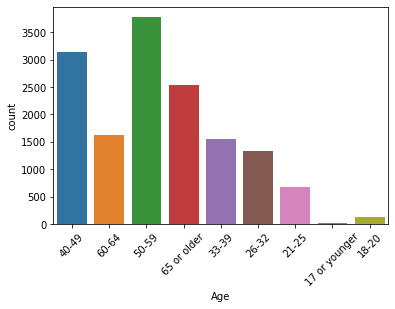

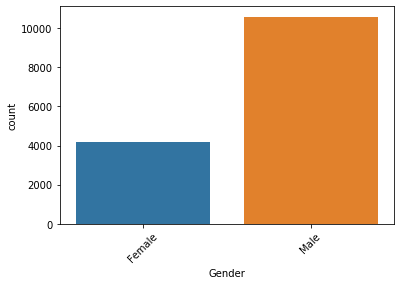

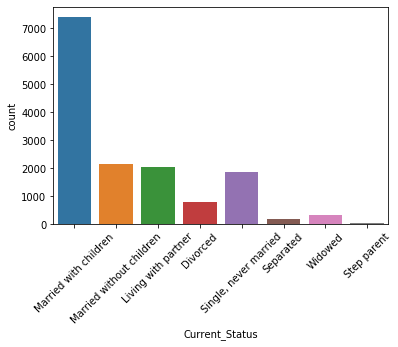

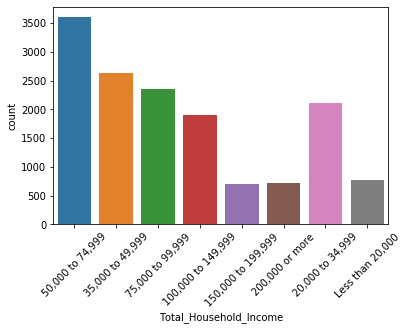

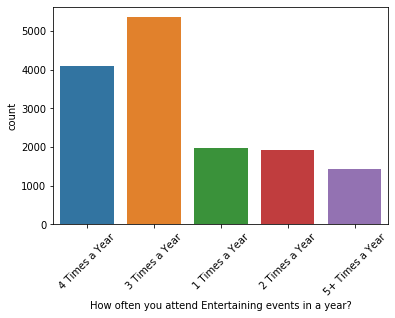

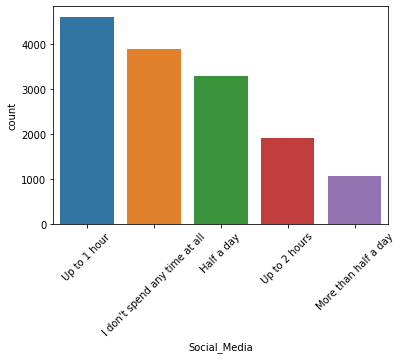

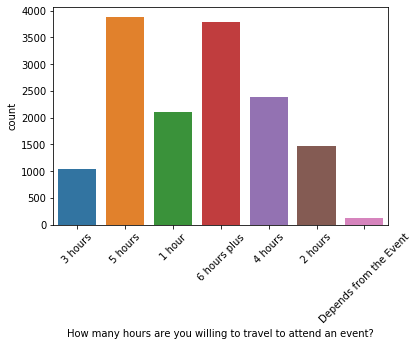

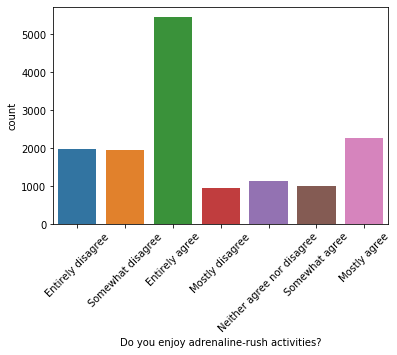

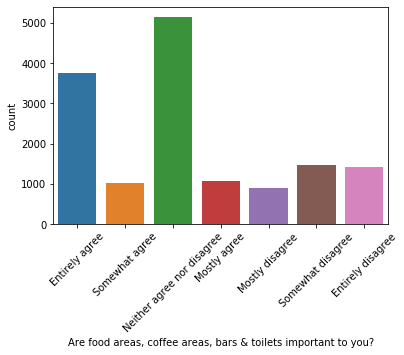

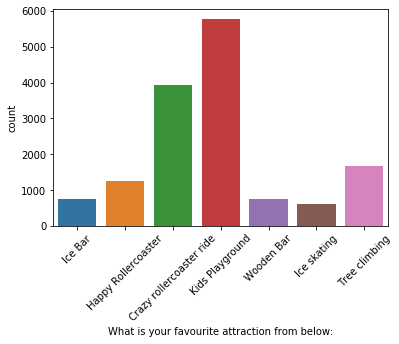

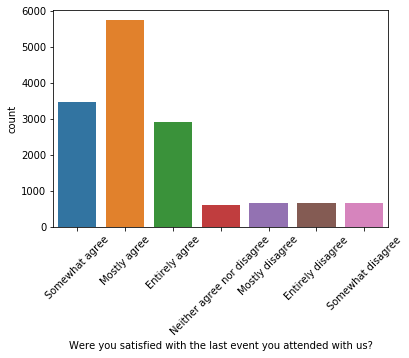

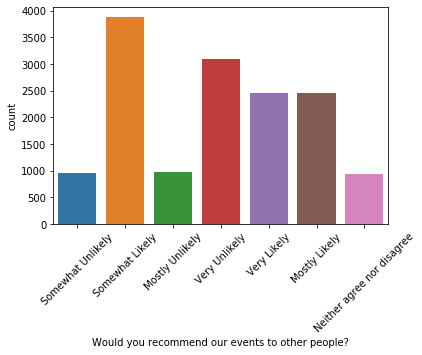

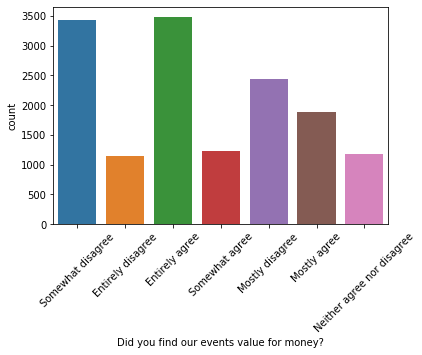

In [11]:
features = ['Age', 'Gender', 'Current_Status', 'Total_Household_Income',
       'How often you attend Entertaining events in a year?', 'Social_Media',
       'How many hours are you willing to travel to attend an event?',
       'Do you enjoy adrenaline-rush activities?',
       'Are food areas, coffee areas, bars & toilets important to you?',
       'What is your favourite attraction from below:',
       'Were you satisfied with the last event you attended with us?',
       'Would you recommend our events to other people?',
       'Did you find our events value for money?']

for f in features:
    sns.countplot(x = f, data = raw_data)
    plt.xticks(rotation = 45)
    plt.show()

In [12]:
raw_query = raw_data[features]

In [13]:
raw_query

,Age,Gender,Current_Status,Total_Household_Income,How often you attend Entertaining events in a year?,Social_Media,How many hours are you willing to travel to attend an event?,Do you enjoy adrenaline-rush activities?,"Are food areas, coffee areas, bars & toilets important to you?",What is your favourite attraction from below:,Were you satisfied with the last event you attended with us?,Would you recommend our events to other people?,Did you find our events value for money?
0,40-49,Female,Married with children,"50,000 to 74,999",4 Times a Year,Up to 1 hour,3 hours,Entirely disagree,Entirely agree,Ice Bar,Somewhat agree,Somewhat Unlikely,Somewhat disagree
1,60-64,Male,Married with children,"35,000 to 49,999",3 Times a Year,Up to 1 hour,5 hours,Somewhat disagree,Entirely agree,Happy Rollercoaster,Mostly agree,Somewhat Likely,Entirely disagree
2,50-59,Male,Married with children,"75,000 to 99,999",3 Times a Year,I don't spend any time at all,5 hours,Somewhat disagree,Somewhat agree,Happy Rollercoaster,Mostly agree,Mostly Unlikely,Entirely disagree
3,50-59,Female,Married without children,"35,000 to 49,999",1 Times a Year,Half a day,1 hour,Entirely agree,Neither agree nor disagree,Crazy rollercoaster ride,Somewhat agree,Somewhat Likely,Somewhat disagree
4,60-64,Male,Married with children,"100,000 to 149,999",3 Times a Year,Up to 1 hour,6 hours plus,Mostly disagree,Neither agree nor disagree,Kids Playground,Entirely agree,Very Unlikely,Entirely agree
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14778,40-49,Male,Married with children,"100,000 to 149,999",3 Times a Year,I don't spend any time at all,4 hours,Somewhat disagree,Entirely agree,Kids Playground,Entirely agree,Very Unlikely,Entirely agree
14779,21-25,Male,"Single, never married","Less than 20,000",4 Times a Year,Up to 2 hours,3 hours,Neither agree nor disagree,Entirely disagree,Wooden Bar,Mostly agree,Mostly Likely,Somewhat agree
14780,40-49,Male,Living with partner,"100,000 to 149,999",4 Times a Year,Up to 1 hour,3 hours,Somewhat agree,Entirely disagree,Ice Bar,Mostly agree,Somewhat Likely,Neither agree nor disagree
14781,50-59,Male,Married with children,"100,000 to 149,999",3 Times a Year,I don't spend any time at all,4 hours,Somewhat disagree,Entirely agree,Kids Playground,Entirely agree,Very Unlikely,Entirely agree


In [14]:
raw_query.shape

(14778, 13)

In [15]:
new_raw_data = pd.get_dummies(raw_query, columns = features)

In [16]:
new_raw_data

,Age_17 or younger,Age_18-20,Age_21-25,Age_26-32,Age_33-39,Age_40-49,Age_50-59,Age_60-64,Age_65 or older,Gender_Female,...,Would you recommend our events to other people?_Somewhat Unlikely,Would you recommend our events to other people?_Very Likely,Would you recommend our events to other people?_Very Unlikely,Did you find our events value for money?_Entirely agree,Did you find our events value for money?_Entirely disagree,Did you find our events value for money?_Mostly agree,Did you find our events value for money?_Mostly disagree,Did you find our events value for money?_Neither agree nor disagree,Did you find our events value for money?_Somewhat agree,Did you find our events value for money?_Somewhat disagree
0,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,1,0,0,...,0,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14778,0,0,0,0,0,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
14779,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
14780,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
14781,0,0,0,0,0,0,1,0,0,0,...,0,0,1,1,0,0,0,0,0,0


In [17]:
X_train = new_raw_data.values

In [18]:
import os
import numpy as np 
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error, classification_report, confusion_matrix, accuracy_score, log_loss
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, k_means
from math import sqrt


np.set_printoptions(formatter = {'float_kind':'{:f}'.format})

%matplotlib inline

In [19]:
kmeans = KMeans(n_clusters = 5, random_state = 453)
kmeans.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=453, tol=0.0001, verbose=0)

In [20]:
kmeans.labels_

array([0, 4, 4, ..., 0, 2, 4])

In [21]:
kmeans.inertia_

101900.28210330302

In [22]:
dream = range(2,20)
inertia = []

for d in dream:
    kmeans = KMeans(n_clusters = d, random_state = 453)
    kmeans.fit(X_train)
    u = kmeans.inertia_
    inertia.append(u)
    print('The inertia for', d, 'cluster is:', u)

The inertia for 2 cluster is: 125619.02972065723
The inertia for 3 cluster is: 114905.38684266692
The inertia for 4 cluster is: 106337.17594801616
The inertia for 5 cluster is: 101900.28210330302
The inertia for 6 cluster is: 96432.61527743531
The inertia for 7 cluster is: 93814.47396613644
The inertia for 8 cluster is: 91696.5408250976
The inertia for 9 cluster is: 89725.03437319282
The inertia for 10 cluster is: 88612.65184638891
The inertia for 11 cluster is: 87584.64941688297
The inertia for 12 cluster is: 86808.33835360577
The inertia for 13 cluster is: 85955.2074030674
The inertia for 14 cluster is: 85022.67606203596
The inertia for 15 cluster is: 84308.65463637775
The inertia for 16 cluster is: 83578.69534445292
The inertia for 17 cluster is: 83119.11443297414
The inertia for 18 cluster is: 82230.6667094537
The inertia for 19 cluster is: 81728.55269468324


Text(0, 0.5, 'Inertia')

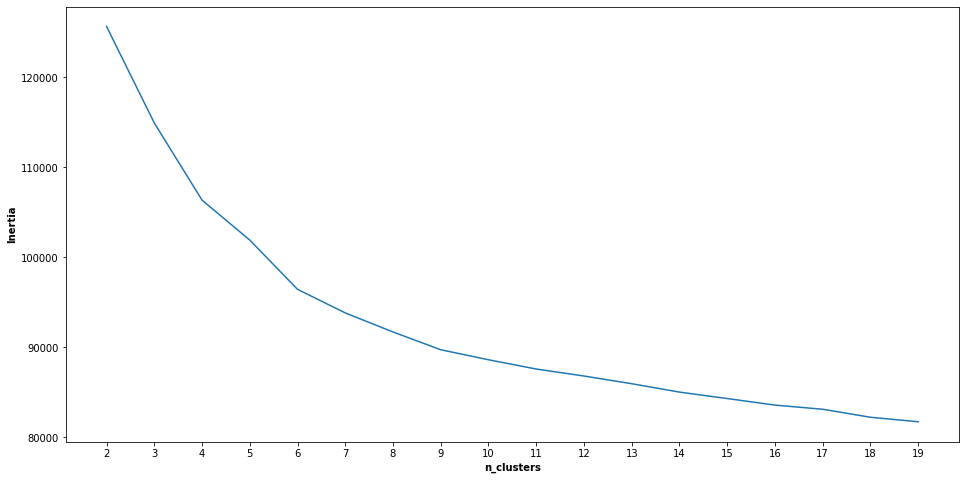

In [23]:
fig, (ax1) = plt.subplots(1, figsize=(16,8))
xx = np.arange(len(dream))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(dream)
plt.xlabel('n_clusters', fontweight = 'bold')
plt.ylabel('Inertia', fontweight = 'bold')

In [24]:
kmeans = KMeans(n_clusters = 5, random_state = 453)
kmeans.fit(X_train)

predictions = kmeans.predict(X_train)

unique, counts = np.unique(predictions, return_counts = True)
counts = counts.reshape(1,5)
countsdlf = pd.DataFrame(counts, columns = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4',])
countsdlf

,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4
0,4464,2836,2178,1224,4076


In [25]:
predictions

array([0, 4, 4, ..., 0, 2, 4])

In [26]:
X = X_train

In [27]:
y_num = predictions

The explained Variance ratio is: [0.167356 0.078177]


<Figure size 432x288 with 0 Axes>

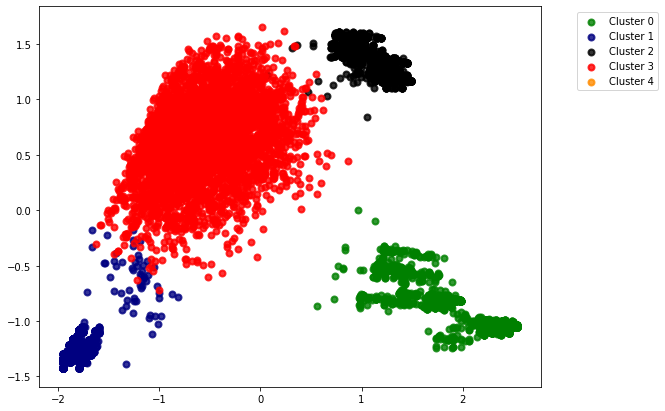

In [28]:
X = X_train
y_num = predictions

target_names = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4',]

pca = PCA(n_components = 2, random_state = 453)
X_r = pca.fit(X).transform(X)

print('The explained Variance ratio is:', pca.explained_variance_ratio_)

plt.figure()
plt.figure(figsize = (9,7))
colors = ['green', 'navy', 'black', 'red', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [1, 2, 3, 4, 5], target_names):
    plt.scatter(X_r[y_num == i, 0], X_r[y_num == i, 1], color = color, lw = lw, alpha=.8, label=target_name)
    
plt.legend(loc = 'best', shadow = False, scatterpoints = 1)
plt.legend(bbox_to_anchor=(1.06,1), loc = 2, borderaxespad = 0.6)
plt.show()

The total variance is: 9.789277508428572
The 95% explained variance is: 9.299813633007144
The total variance explained by 30 n_components is: 7.800063287617342
The total variance explained by 35 n_components is: 8.200059944222119
The total variance explained by 40 n_components is: 8.559358189926284
The total variance explained by 45 n_components is: 8.877493928813399
The total variance explained by 50 n_components is: 9.157222065601195
The total variance explained by 53 n_components is: 9.301801997586796


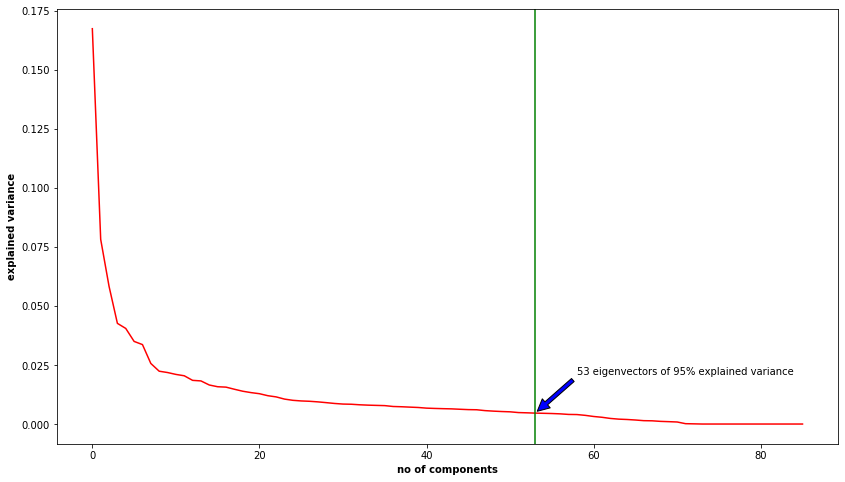

In [29]:
n_components = X.shape[1]
dream = range(2,20)

pca = PCA(n_components = n_components, random_state = 453)
X_r = pca.fit(X).transform(X)    

total_variance = sum(pca.explained_variance_)
print('The total variance is:', total_variance)
var_95 = total_variance * 0.95
print('The 95% explained variance is:', var_95)

a = zip(range(0, n_components), pca.explained_variance_)
a = pd.DataFrame(a, columns = ['N_components', 'Explained Variance'])

print('The total variance explained by 30 n_components is:', sum(a['Explained Variance'][0:30]))
print('The total variance explained by 35 n_components is:', sum(a['Explained Variance'][0:35]))
print('The total variance explained by 40 n_components is:', sum(a['Explained Variance'][0:40]))
print('The total variance explained by 45 n_components is:', sum(a['Explained Variance'][0:45]))
print('The total variance explained by 50 n_components is:', sum(a['Explained Variance'][0:50]))
print('The total variance explained by 53 n_components is:', sum(a['Explained Variance'][0:53]))

plt.figure(figsize=(14,8))
plt.plot(pca.explained_variance_ratio_, color = 'red')
plt.xlabel('no of components', fontweight = 'bold')
plt.ylabel('explained variance', fontweight = 'bold')

plt.axvline(53, label = '95% variance explained', color = 'green')

plt.annotate('53 eigenvectors of 95% explained variance', xy=(53, pca.explained_variance_ratio_[53]), xytext=(58, pca.explained_variance_ratio_[10]), arrowprops=dict(facecolor = 'blue', shrink = 0.05))
plt.show()

In [30]:
X.shape[1]

86

In [31]:
pca.explained_variance_

array([1.638291, 0.765297, 0.570658, 0.417147, 0.396141, 0.342363,
       0.329219, 0.251019, 0.218921, 0.213426, 0.205639, 0.200009,
       0.180994, 0.178661, 0.161728, 0.154566, 0.152901, 0.144160,
       0.135960, 0.130191, 0.125667, 0.117436, 0.112446, 0.103340,
       0.098261, 0.095676, 0.094280, 0.091827, 0.088623, 0.085214,
       0.082753, 0.081975, 0.079758, 0.078259, 0.077252, 0.076313,
       0.072711, 0.071622, 0.070070, 0.068582, 0.065848, 0.064617,
       0.063634, 0.062826, 0.061211, 0.059743, 0.059152, 0.055576,
       0.053455, 0.051803, 0.050604, 0.047493, 0.046484, 0.045259,
       0.044467, 0.043553, 0.042167, 0.039808, 0.039274, 0.035945,
       0.031283, 0.027957, 0.023212, 0.020263, 0.018821, 0.016665,
       0.013952, 0.013339, 0.011040, 0.009819, 0.008447, 0.001457,
       0.000749, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000,
       0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000,
       0.000000, 0.000000])

The inertia for 2 cluster is: 118418.00533439948
The inertia for 3 cluster is: 107706.74123846639
The inertia for 4 cluster is: 99150.89658689543
The inertia for 5 cluster is: 93688.35998579233
The inertia for 6 cluster is: 89259.77886193992
The inertia for 7 cluster is: 86642.30941150703
The inertia for 8 cluster is: 84676.51096072514
The inertia for 9 cluster is: 82842.46448863925
The inertia for 10 cluster is: 81310.3327328749
The inertia for 11 cluster is: 80308.07957699495
The inertia for 12 cluster is: 79350.19735240041
The inertia for 13 cluster is: 78775.20558800524
The inertia for 14 cluster is: 78202.6463746871
The inertia for 15 cluster is: 77481.72332907283
The inertia for 16 cluster is: 76708.55366578116
The inertia for 17 cluster is: 75954.68009892206
The inertia for 18 cluster is: 75415.2073181942
The inertia for 19 cluster is: 74627.86647826617


Text(0, 0.5, 'Inertia')

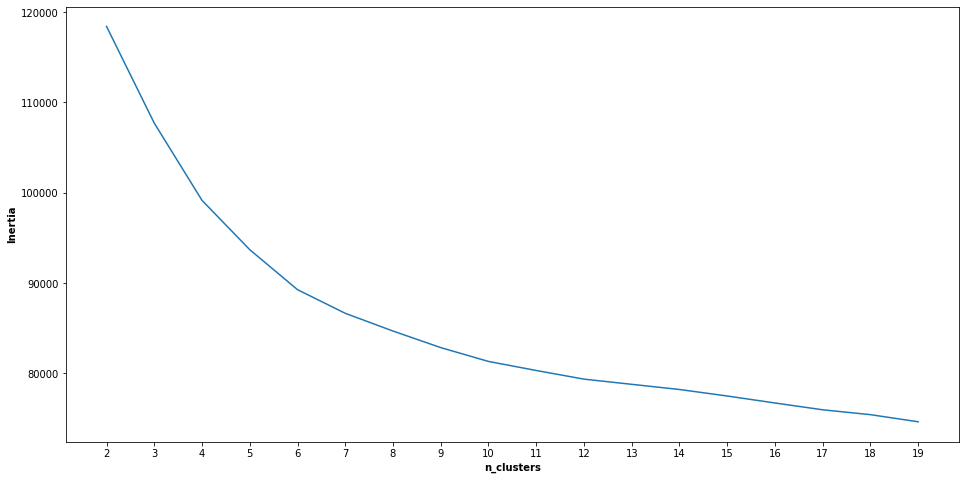

In [33]:
pca = PCA(n_components = 53, random_state = 453)
X_r = pca.fit(X).transform(X)    

dream = range(2,20)
inertia = []

for d in dream:
    kmeans = KMeans(n_clusters = d, random_state = 453)
    kmeans.fit(X_r)
    u = kmeans.inertia_
    inertia.append(u)
    print('The inertia for', d, 'cluster is:', u)
fig, (ax1) = plt.subplots(1, figsize=(16,8))
xx = np.arange(len(dream))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(dream)
plt.xlabel('n_clusters', fontweight = 'bold')
plt.ylabel('Inertia', fontweight = 'bold')

In [34]:
new_raw_data

,Age_17 or younger,Age_18-20,Age_21-25,Age_26-32,Age_33-39,Age_40-49,Age_50-59,Age_60-64,Age_65 or older,Gender_Female,...,Would you recommend our events to other people?_Somewhat Unlikely,Would you recommend our events to other people?_Very Likely,Would you recommend our events to other people?_Very Unlikely,Did you find our events value for money?_Entirely agree,Did you find our events value for money?_Entirely disagree,Did you find our events value for money?_Mostly agree,Did you find our events value for money?_Mostly disagree,Did you find our events value for money?_Neither agree nor disagree,Did you find our events value for money?_Somewhat agree,Did you find our events value for money?_Somewhat disagree
0,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,1,0,0,...,0,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14778,0,0,0,0,0,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
14779,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
14780,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
14781,0,0,0,0,0,0,1,0,0,0,...,0,0,1,1,0,0,0,0,0,0


In [35]:
new_raw_data.columns

Index(['Age_17 or younger', 'Age_18-20', 'Age_21-25', 'Age_26-32', 'Age_33-39',
       'Age_40-49', 'Age_50-59', 'Age_60-64', 'Age_65 or older',
       'Gender_Female', 'Gender_Male', 'Current_Status_Divorced',
       'Current_Status_Living with partner',
       'Current_Status_Married with children',
       'Current_Status_Married without children', 'Current_Status_Separated',
       'Current_Status_Single, never married', 'Current_Status_Step parent',
       'Current_Status_Widowed', 'Total_Household_Income_100,000 to 149,999',
       'Total_Household_Income_150,000 to 199,999',
       'Total_Household_Income_20,000 to 34,999',
       'Total_Household_Income_200,000 or more',
       'Total_Household_Income_35,000 to 49,999',
       'Total_Household_Income_50,000 to 74,999',
       'Total_Household_Income_75,000 to 99,999',
       'Total_Household_Income_Less than 20,000',
       'How often you attend Entertaining events in a year?_1 Times a Year',
       'How often you attend Enterta

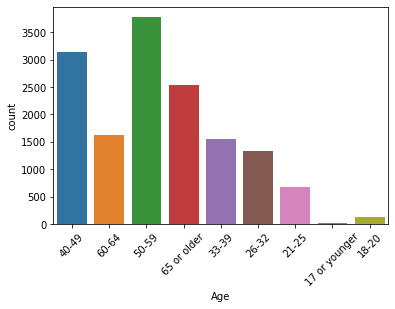

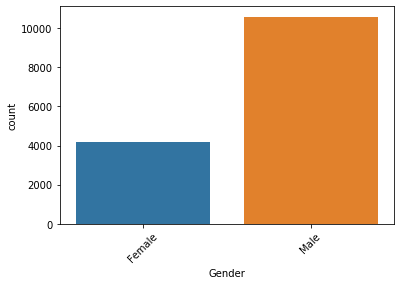

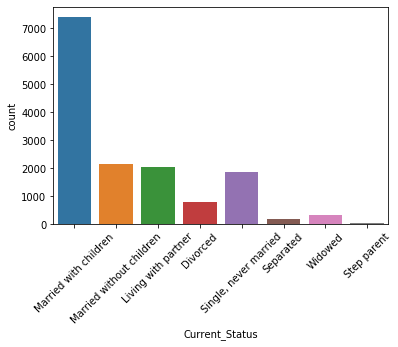

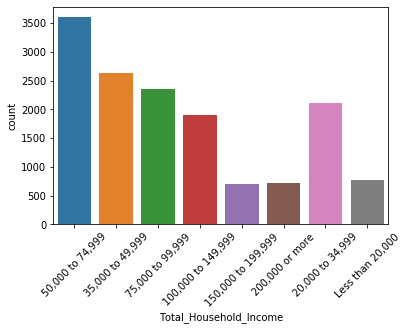

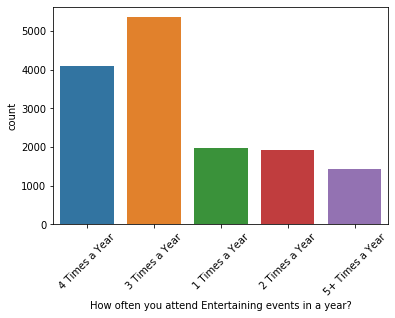

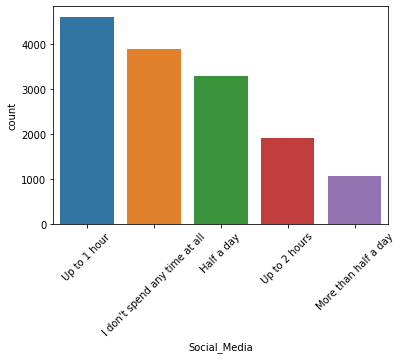

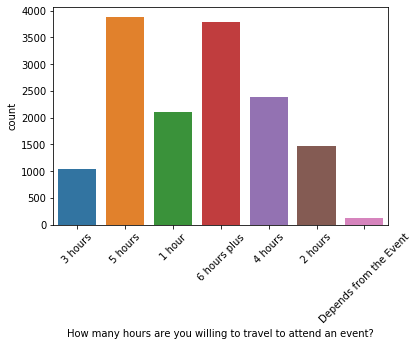

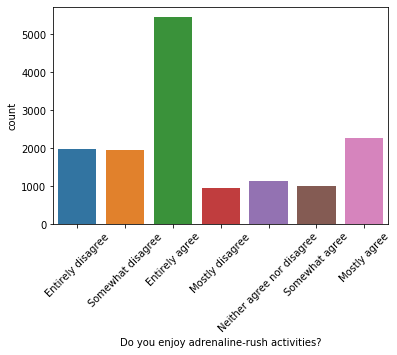

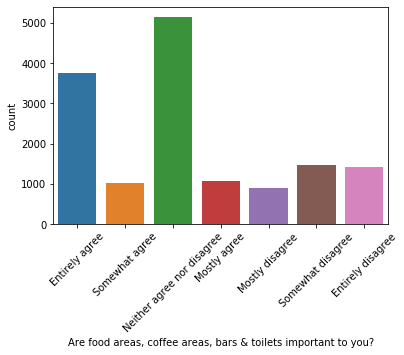

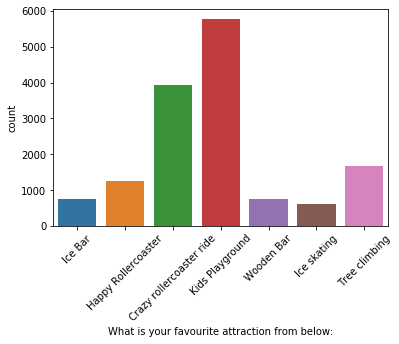

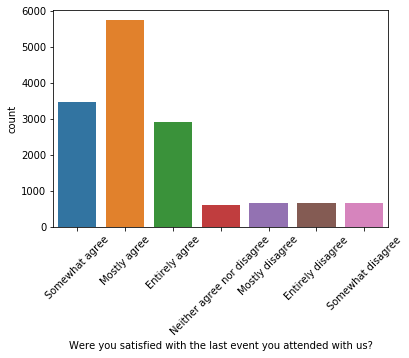

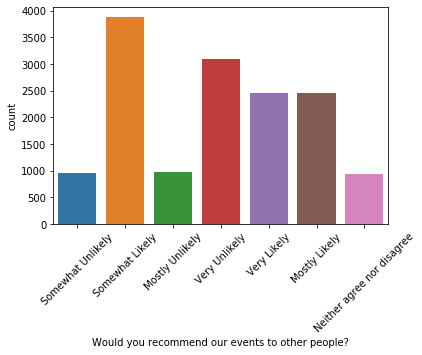

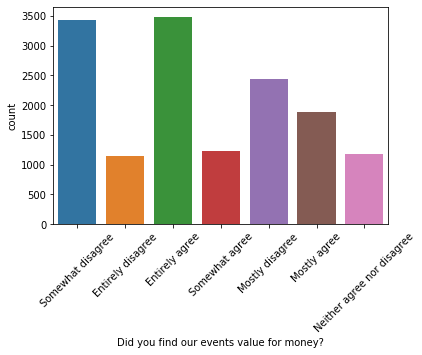

In [36]:
for f in features:
    sns.countplot(x = f, data = raw_data)
    plt.xticks(rotation = 45)
    plt.show()

In [44]:
new_raw_data['How often you attend Entertaining events in a year?_1_or_2 Times a Year'] = 0
new_raw_data['How often you attend Entertaining events in a year?_1_or_2 Times a Year'][(new_raw_data['How often you attend Entertaining events in a year?_1 Times a Year'] == 1) | (new_raw_data['How often you attend Entertaining events in a year?_2 Times a Year'] == 1)] = 1

new_raw_data['How often you attend Entertaining events in a year?_4_or_5+ Times a Year'] = 0
new_raw_data['How often you attend Entertaining events in a year?_4_or_5+ Times a Year'][(new_raw_data['How often you attend Entertaining events in a year?_4 Times a Year'] == 1) | (new_raw_data['How often you attend Entertaining events in a year?_5+ Times a Year'] == 1)] = 1

C:\Users\ASHE\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ASHE\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [47]:
new_raw_data.columns

Index(['Age_17 or younger', 'Age_18-20', 'Age_21-25', 'Age_26-32', 'Age_33-39',
       'Age_40-49', 'Age_50-59', 'Age_60-64', 'Age_65 or older',
       'Gender_Female', 'Gender_Male', 'Current_Status_Divorced',
       'Current_Status_Living with partner',
       'Current_Status_Married with children',
       'Current_Status_Married without children', 'Current_Status_Separated',
       'Current_Status_Single, never married', 'Current_Status_Step parent',
       'Current_Status_Widowed', 'Total_Household_Income_100,000 to 149,999',
       'Total_Household_Income_150,000 to 199,999',
       'Total_Household_Income_20,000 to 34,999',
       'Total_Household_Income_200,000 or more',
       'Total_Household_Income_35,000 to 49,999',
       'Total_Household_Income_50,000 to 74,999',
       'Total_Household_Income_75,000 to 99,999',
       'Total_Household_Income_Less than 20,000',
       'How often you attend Entertaining events in a year?_1 Times a Year',
       'How often you attend Enterta

In [46]:
new_raw_data.columns = new_raw_data.columns.str.replace("'","")

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error, accuracy_score, classification_report, confusion_matrix, log_loss
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.cluster import KMeans, k_means
from math import sqrt

np.set_printoptions(formatter={'float_kind':'{:f}'.format})

%matplotlib inline

In [15]:
import pyodbc as podbc
conn2 = podbc.connect("Driver={SQL Server Native Client 11.0};"
                     "Server=DESKTOP-K9OGQA2;"
                     "Database=K Means;"
                     "True_Connection = yes;")

SQL_Query = pd.read_sql_query('''SELECT * FROM [K Means]''', conn2)
SQL_Query

InterfaceError: ('28000', "[28000] [Microsoft][SQL Server Native Client 11.0][SQL Server]Login failed for user ''. (18456) (SQLDriverConnect); [28000] [Microsoft][SQL Server Native Client 11.0]Invalid connection string attribute (0); [28000] [Microsoft][SQL Server Native Client 11.0][SQL Server]Login failed for user ''. (18456); [28000] [Microsoft][SQL Server Native Client 11.0]Invalid connection string attribute (0)")

In [ ]:
"Driver={SQL Server Native Client 11.0};"

In [2]:
raw_data =  pd.read_csv('C:\\Users\ASHE\\Documents\\ML\\k means.csv')
raw_data

,CUSTOMER,Age,Gender,Postcode,District,Constituency,latitude,longitude,Current_Status,Total_Household_Income,How often you attend Entertaining events in a year?,Social_Media,How many hours are you willing to travel to attend an event?,Do you enjoy adrenaline-rush activities?,"Are food areas, coffee areas, bars & toilets important to you?",What is your favourite attraction from below:,Were you satisfied with the last event you attended with us?,Would you recommend our events to other people?,Did you find our events value for money?
0,1,40-49,Female,AL9 7BN,Welwyn Hatfield,Welwyn Hatfield,51.727429,-0.183648,Married with children,"50,000 to 74,999",4 Times a Year,Up to 1 hour,3 hours,Entirely disagree,Entirely agree,Ice Bar,Somewhat agree,Somewhat Unlikely,Somewhat disagree
1,2,60-64,Male,AL7 1ZW,Welwyn Hatfield,Welwyn Hatfield,51.804482,-0.195898,Married with children,"35,000 to 49,999",3 Times a Year,Up to 1 hour,5 hours,Somewhat disagree,Entirely agree,Happy Rollercoaster,Mostly agree,Somewhat Likely,Entirely disagree
2,3,50-59,Male,AB4 5JX,Aberdeenshire,Banff and Buchan,57.692200,-2.022295,Married with children,"75,000 to 99,999",3 Times a Year,I don't spend any time at all,5 hours,Somewhat disagree,Somewhat agree,Happy Rollercoaster,Mostly agree,Mostly Unlikely,Entirely disagree
3,4,50-59,Female,B24 0DL,Birmingham,"Birmingham, Erdington",52.526595,-1.822211,Married without children,"35,000 to 49,999",1 Times a Year,Half a day,1 hour,Entirely agree,Neither agree nor disagree,Crazy rollercoaster ride,Somewhat agree,Somewhat Likely,Somewhat disagree
4,5,60-64,Male,E17 5QP,Waltham Forest,Walthamstow,51.593979,-0.040803,Married with children,"100,000 to 149,999",3 Times a Year,Up to 1 hour,6 hours plus,Mostly disagree,Neither agree nor disagree,Kids Playground,Entirely agree,Very Unlikely,Entirely agree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14778,16262,40-49,Male,AB23 8JT,Aberdeen City,Gordon,57.203497,-2.096799,Married with children,"100,000 to 149,999",3 Times a Year,I don't spend any time at all,4 hours,Somewhat disagree,Entirely agree,Kids Playground,Entirely agree,Very Unlikely,Entirely agree
14779,16263,21-25,Male,CV34 5JN,Warwick,Warwick and Leamington,52.297782,-1.588626,"Single, never married","Less than 20,000",4 Times a Year,Up to 2 hours,3 hours,Neither agree nor disagree,Entirely disagree,Wooden Bar,Mostly agree,Mostly Likely,Somewhat agree
14780,16264,40-49,Male,CM8 1FU,Braintree,Witham,51.789173,0.624822,Living with partner,"100,000 to 149,999",4 Times a Year,Up to 1 hour,3 hours,Somewhat agree,Entirely disagree,Ice Bar,Mostly agree,Somewhat Likely,Neither agree nor disagree
14781,16266,50-59,Male,DD8 3JF,Angus,Angus,56.648815,-2.895498,Married with children,"100,000 to 149,999",3 Times a Year,I don't spend any time at all,4 hours,Somewhat disagree,Entirely agree,Kids Playground,Entirely agree,Very Unlikely,Entirely agree


In [3]:
raw_data.isnull().sum()

CUSTOMER                                                          0
Age                                                               0
Gender                                                            0
Postcode                                                          0
District                                                          0
Constituency                                                      0
latitude                                                          0
longitude                                                         0
Current_Status                                                    0
Total_Household_Income                                            5
How often you attend Entertaining events in a year?               5
Social_Media                                                      5
How many hours are you willing to travel to attend an event?      5
Do you enjoy adrenaline-rush activities?                          5
Are food areas, coffee areas, bars & toilets imp

In [4]:
raw_data[raw_data.isnull()]

,CUSTOMER,Age,Gender,Postcode,District,Constituency,latitude,longitude,Current_Status,Total_Household_Income,How often you attend Entertaining events in a year?,Social_Media,How many hours are you willing to travel to attend an event?,Do you enjoy adrenaline-rush activities?,"Are food areas, coffee areas, bars & toilets important to you?",What is your favourite attraction from below:,Were you satisfied with the last event you attended with us?,Would you recommend our events to other people?,Did you find our events value for money?
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14779,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14780,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14781,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
raw_data

,CUSTOMER,Age,Gender,Postcode,District,Constituency,latitude,longitude,Current_Status,Total_Household_Income,How often you attend Entertaining events in a year?,Social_Media,How many hours are you willing to travel to attend an event?,Do you enjoy adrenaline-rush activities?,"Are food areas, coffee areas, bars & toilets important to you?",What is your favourite attraction from below:,Were you satisfied with the last event you attended with us?,Would you recommend our events to other people?,Did you find our events value for money?
0,1,40-49,Female,AL9 7BN,Welwyn Hatfield,Welwyn Hatfield,51.727429,-0.183648,Married with children,"50,000 to 74,999",4 Times a Year,Up to 1 hour,3 hours,Entirely disagree,Entirely agree,Ice Bar,Somewhat agree,Somewhat Unlikely,Somewhat disagree
1,2,60-64,Male,AL7 1ZW,Welwyn Hatfield,Welwyn Hatfield,51.804482,-0.195898,Married with children,"35,000 to 49,999",3 Times a Year,Up to 1 hour,5 hours,Somewhat disagree,Entirely agree,Happy Rollercoaster,Mostly agree,Somewhat Likely,Entirely disagree
2,3,50-59,Male,AB4 5JX,Aberdeenshire,Banff and Buchan,57.692200,-2.022295,Married with children,"75,000 to 99,999",3 Times a Year,I don't spend any time at all,5 hours,Somewhat disagree,Somewhat agree,Happy Rollercoaster,Mostly agree,Mostly Unlikely,Entirely disagree
3,4,50-59,Female,B24 0DL,Birmingham,"Birmingham, Erdington",52.526595,-1.822211,Married without children,"35,000 to 49,999",1 Times a Year,Half a day,1 hour,Entirely agree,Neither agree nor disagree,Crazy rollercoaster ride,Somewhat agree,Somewhat Likely,Somewhat disagree
4,5,60-64,Male,E17 5QP,Waltham Forest,Walthamstow,51.593979,-0.040803,Married with children,"100,000 to 149,999",3 Times a Year,Up to 1 hour,6 hours plus,Mostly disagree,Neither agree nor disagree,Kids Playground,Entirely agree,Very Unlikely,Entirely agree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14778,16262,40-49,Male,AB23 8JT,Aberdeen City,Gordon,57.203497,-2.096799,Married with children,"100,000 to 149,999",3 Times a Year,I don't spend any time at all,4 hours,Somewhat disagree,Entirely agree,Kids Playground,Entirely agree,Very Unlikely,Entirely agree
14779,16263,21-25,Male,CV34 5JN,Warwick,Warwick and Leamington,52.297782,-1.588626,"Single, never married","Less than 20,000",4 Times a Year,Up to 2 hours,3 hours,Neither agree nor disagree,Entirely disagree,Wooden Bar,Mostly agree,Mostly Likely,Somewhat agree
14780,16264,40-49,Male,CM8 1FU,Braintree,Witham,51.789173,0.624822,Living with partner,"100,000 to 149,999",4 Times a Year,Up to 1 hour,3 hours,Somewhat agree,Entirely disagree,Ice Bar,Mostly agree,Somewhat Likely,Neither agree nor disagree
14781,16266,50-59,Male,DD8 3JF,Angus,Angus,56.648815,-2.895498,Married with children,"100,000 to 149,999",3 Times a Year,I don't spend any time at all,4 hours,Somewhat disagree,Entirely agree,Kids Playground,Entirely agree,Very Unlikely,Entirely agree


In [6]:
raw_data[raw_data['Social_Media'].isnull()]

,CUSTOMER,Age,Gender,Postcode,District,Constituency,latitude,longitude,Current_Status,Total_Household_Income,How often you attend Entertaining events in a year?,Social_Media,How many hours are you willing to travel to attend an event?,Do you enjoy adrenaline-rush activities?,"Are food areas, coffee areas, bars & toilets important to you?",What is your favourite attraction from below:,Were you satisfied with the last event you attended with us?,Would you recommend our events to other people?,Did you find our events value for money?
21,23,50-60,Female,EN3 4YQ,Enfield,Edmonton,51.643546,-0.029532,Married with children,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,24,50-61,Female,EN3 4YQ,Enfield,Edmonton,51.643546,-0.029532,Married with children,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,25,50-62,Female,EN3 4YQ,Enfield,Edmonton,51.643546,-0.029532,Married with children,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,26,50-63,Female,EN3 4YQ,Enfield,Edmonton,51.643546,-0.029532,Married with children,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,27,50-64,Female,EN3 4YQ,Enfield,Edmonton,51.643546,-0.029532,Married with children,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
raw_data = raw_data.dropna(subset = ['Social_Media'])

In [8]:
raw_data


,CUSTOMER,Age,Gender,Postcode,District,Constituency,latitude,longitude,Current_Status,Total_Household_Income,How often you attend Entertaining events in a year?,Social_Media,How many hours are you willing to travel to attend an event?,Do you enjoy adrenaline-rush activities?,"Are food areas, coffee areas, bars & toilets important to you?",What is your favourite attraction from below:,Were you satisfied with the last event you attended with us?,Would you recommend our events to other people?,Did you find our events value for money?
0,1,40-49,Female,AL9 7BN,Welwyn Hatfield,Welwyn Hatfield,51.727429,-0.183648,Married with children,"50,000 to 74,999",4 Times a Year,Up to 1 hour,3 hours,Entirely disagree,Entirely agree,Ice Bar,Somewhat agree,Somewhat Unlikely,Somewhat disagree
1,2,60-64,Male,AL7 1ZW,Welwyn Hatfield,Welwyn Hatfield,51.804482,-0.195898,Married with children,"35,000 to 49,999",3 Times a Year,Up to 1 hour,5 hours,Somewhat disagree,Entirely agree,Happy Rollercoaster,Mostly agree,Somewhat Likely,Entirely disagree
2,3,50-59,Male,AB4 5JX,Aberdeenshire,Banff and Buchan,57.692200,-2.022295,Married with children,"75,000 to 99,999",3 Times a Year,I don't spend any time at all,5 hours,Somewhat disagree,Somewhat agree,Happy Rollercoaster,Mostly agree,Mostly Unlikely,Entirely disagree
3,4,50-59,Female,B24 0DL,Birmingham,"Birmingham, Erdington",52.526595,-1.822211,Married without children,"35,000 to 49,999",1 Times a Year,Half a day,1 hour,Entirely agree,Neither agree nor disagree,Crazy rollercoaster ride,Somewhat agree,Somewhat Likely,Somewhat disagree
4,5,60-64,Male,E17 5QP,Waltham Forest,Walthamstow,51.593979,-0.040803,Married with children,"100,000 to 149,999",3 Times a Year,Up to 1 hour,6 hours plus,Mostly disagree,Neither agree nor disagree,Kids Playground,Entirely agree,Very Unlikely,Entirely agree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14778,16262,40-49,Male,AB23 8JT,Aberdeen City,Gordon,57.203497,-2.096799,Married with children,"100,000 to 149,999",3 Times a Year,I don't spend any time at all,4 hours,Somewhat disagree,Entirely agree,Kids Playground,Entirely agree,Very Unlikely,Entirely agree
14779,16263,21-25,Male,CV34 5JN,Warwick,Warwick and Leamington,52.297782,-1.588626,"Single, never married","Less than 20,000",4 Times a Year,Up to 2 hours,3 hours,Neither agree nor disagree,Entirely disagree,Wooden Bar,Mostly agree,Mostly Likely,Somewhat agree
14780,16264,40-49,Male,CM8 1FU,Braintree,Witham,51.789173,0.624822,Living with partner,"100,000 to 149,999",4 Times a Year,Up to 1 hour,3 hours,Somewhat agree,Entirely disagree,Ice Bar,Mostly agree,Somewhat Likely,Neither agree nor disagree
14781,16266,50-59,Male,DD8 3JF,Angus,Angus,56.648815,-2.895498,Married with children,"100,000 to 149,999",3 Times a Year,I don't spend any time at all,4 hours,Somewhat disagree,Entirely agree,Kids Playground,Entirely agree,Very Unlikely,Entirely agree


In [9]:
for column in raw_data:
    unique_vals = np.unique(raw_data[column])
    nr_values = len(unique_vals)
    if nr_values < 10:
        print('the number of values of feature {} is {} -- {}'.format(column, nr_values, unique_vals))
    else:
        print('the number of values of feature {} is {}'.format(column, nr_values))

the number of values of feature CUSTOMER is 14778
the number of values of feature Age is 9 -- ['17 or younger' '18-20' '21-25' '26-32' '33-39' '40-49' '50-59' '60-64'
 '65 or older']
the number of values of feature Gender is 2 -- ['Female' 'Male']
the number of values of feature Postcode is 14674
the number of values of feature District is 225
the number of values of feature Constituency is 358
the number of values of feature latitude is 13242
the number of values of feature longitude is 13262
the number of values of feature Current_Status is 8 -- ['Divorced' 'Living with partner' 'Married with children'
 'Married without children' 'Separated' 'Single, never married'
 'Step parent' 'Widowed']
the number of values of feature Total_Household_Income is 8 -- ['100,000 to 149,999' '150,000 to 199,999' '20,000 to 34,999'
 '200,000 or more' '35,000 to 49,999' '50,000 to 74,999'
 '75,000 to 99,999' 'Less than 20,000']
the number of values of feature How often you attend Entertaining events in 

In [10]:
raw_data.columns

Index(['CUSTOMER', 'Age', 'Gender', 'Postcode', 'District', 'Constituency',
       'latitude', 'longitude', 'Current_Status', 'Total_Household_Income',
       'How often you attend Entertaining events in a year?', 'Social_Media',
       'How many hours are you willing to travel to attend an event?',
       'Do you enjoy adrenaline-rush activities?',
       'Are food areas, coffee areas, bars & toilets important to you?',
       'What is your favourite attraction from below:',
       'Were you satisfied with the last event you attended with us?',
       'Would you recommend our events to other people?',
       'Did you find our events value for money?'],
      dtype='object')

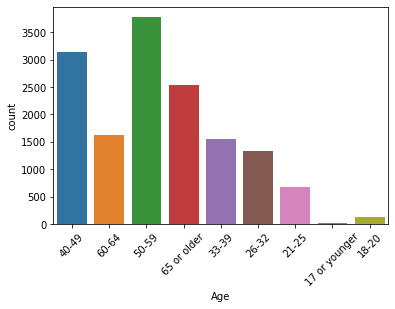

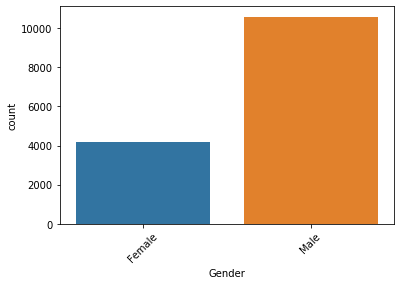

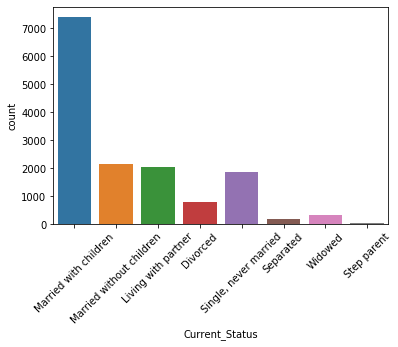

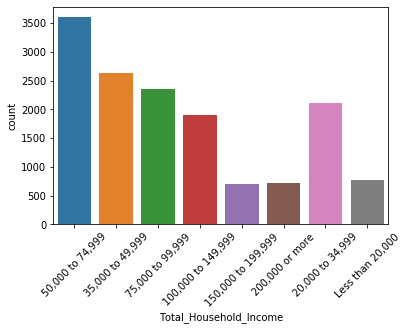

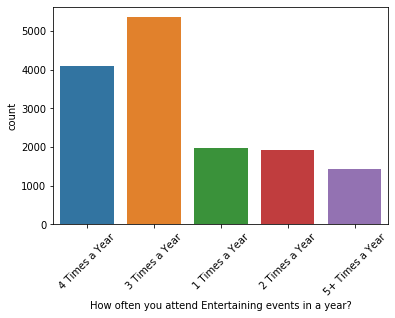

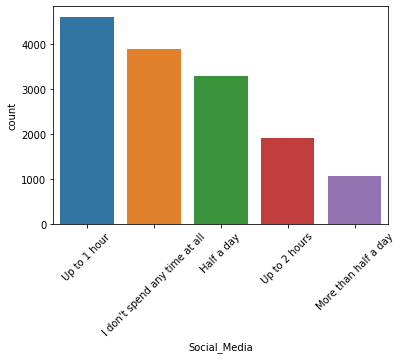

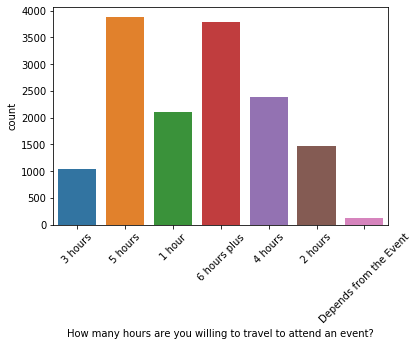

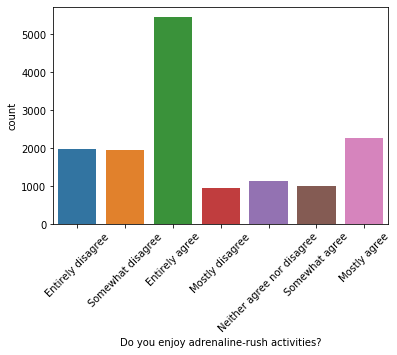

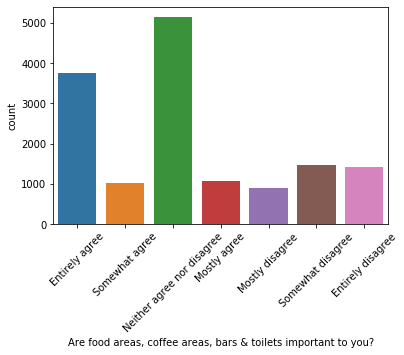

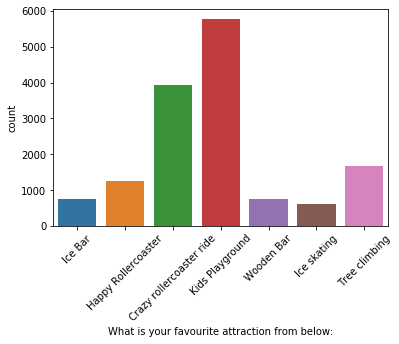

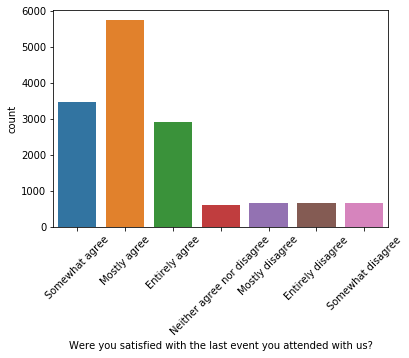

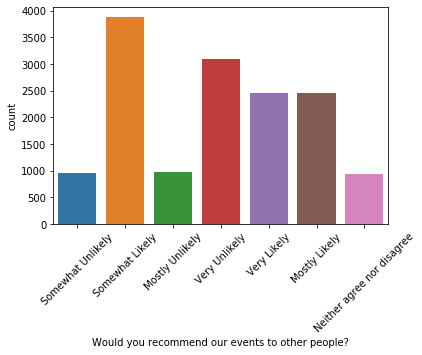

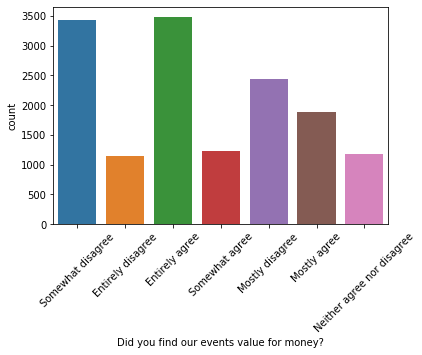

In [11]:
features = ['Age', 'Gender', 'Current_Status', 'Total_Household_Income',
       'How often you attend Entertaining events in a year?', 'Social_Media',
       'How many hours are you willing to travel to attend an event?',
       'Do you enjoy adrenaline-rush activities?',
       'Are food areas, coffee areas, bars & toilets important to you?',
       'What is your favourite attraction from below:',
       'Were you satisfied with the last event you attended with us?',
       'Would you recommend our events to other people?',
       'Did you find our events value for money?']

for f in features:
    sns.countplot(x = f, data = raw_data)
    plt.xticks(rotation = 45)
    plt.show()

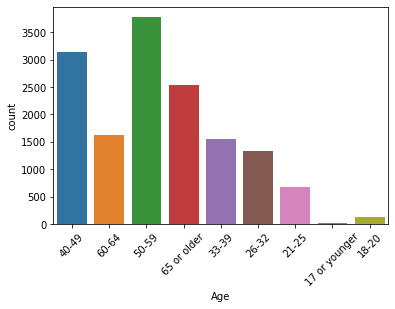

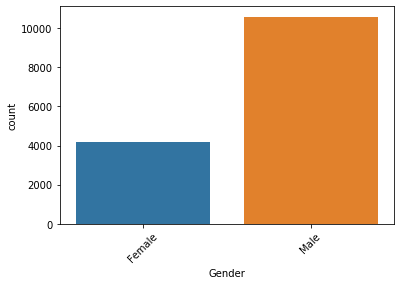

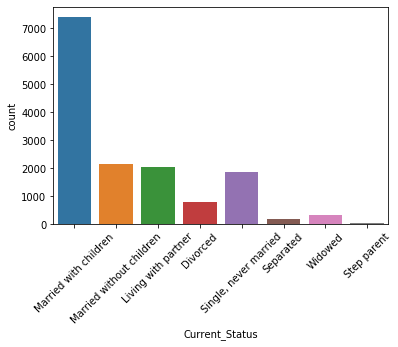

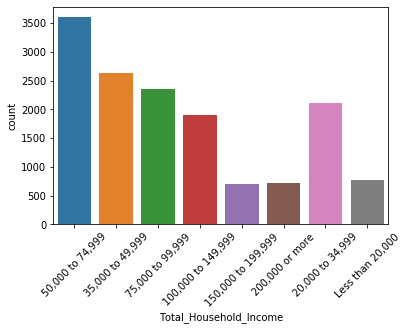

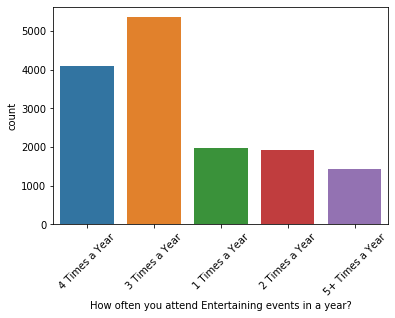

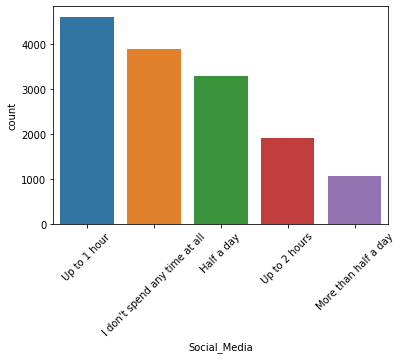

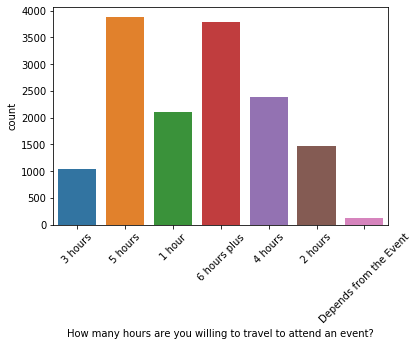

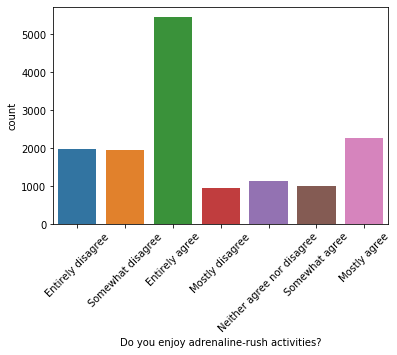

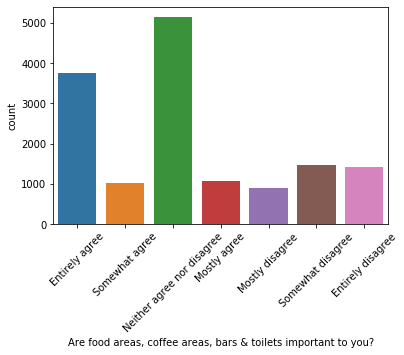

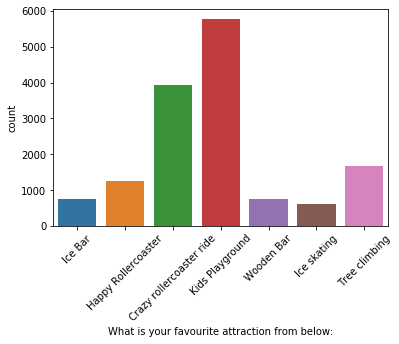

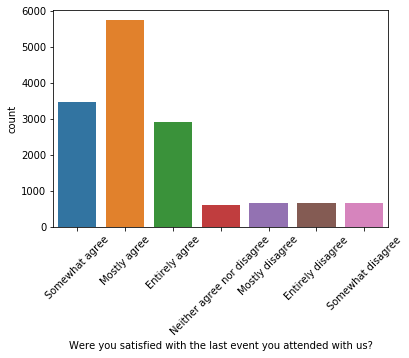

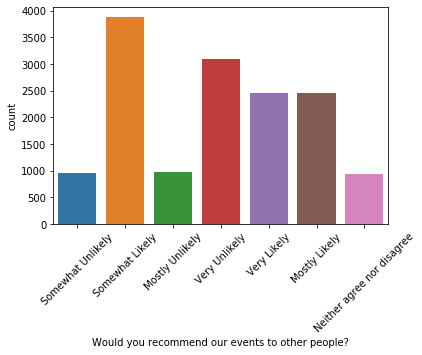

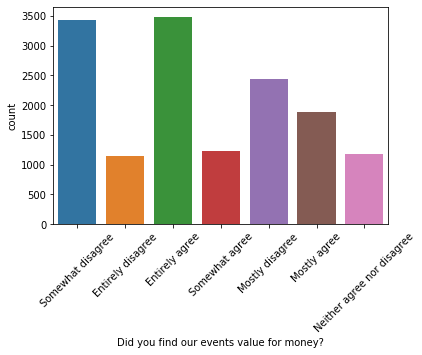

In [12]:
features = ['Age', 'Gender', 'Current_Status', 'Total_Household_Income',
       'How often you attend Entertaining events in a year?', 'Social_Media',
       'How many hours are you willing to travel to attend an event?',
       'Do you enjoy adrenaline-rush activities?',
       'Are food areas, coffee areas, bars & toilets important to you?',
       'What is your favourite attraction from below:',
       'Were you satisfied with the last event you attended with us?',
       'Would you recommend our events to other people?',
       'Did you find our events value for money?']

for f in features:
    sns.countplot(x = f, data = raw_data)
    plt.xticks(rotation = 45)
    plt.show()

In [14]:
features

['Age',
 'Gender',
 'Current_Status',
 'Total_Household_Income',
 'How often you attend Entertaining events in a year?',
 'Social_Media',
 'How many hours are you willing to travel to attend an event?',
 'Do you enjoy adrenaline-rush activities?',
 'Are food areas, coffee areas, bars & toilets important to you?',
 'What is your favourite attraction from below:',
 'Were you satisfied with the last event you attended with us?',
 'Would you recommend our events to other people?',
 'Did you find our events value for money?']

In [15]:
raw_way = raw_data[features]

In [16]:
raw_way

,Age,Gender,Current_Status,Total_Household_Income,How often you attend Entertaining events in a year?,Social_Media,How many hours are you willing to travel to attend an event?,Do you enjoy adrenaline-rush activities?,"Are food areas, coffee areas, bars & toilets important to you?",What is your favourite attraction from below:,Were you satisfied with the last event you attended with us?,Would you recommend our events to other people?,Did you find our events value for money?
0,40-49,Female,Married with children,"50,000 to 74,999",4 Times a Year,Up to 1 hour,3 hours,Entirely disagree,Entirely agree,Ice Bar,Somewhat agree,Somewhat Unlikely,Somewhat disagree
1,60-64,Male,Married with children,"35,000 to 49,999",3 Times a Year,Up to 1 hour,5 hours,Somewhat disagree,Entirely agree,Happy Rollercoaster,Mostly agree,Somewhat Likely,Entirely disagree
2,50-59,Male,Married with children,"75,000 to 99,999",3 Times a Year,I don't spend any time at all,5 hours,Somewhat disagree,Somewhat agree,Happy Rollercoaster,Mostly agree,Mostly Unlikely,Entirely disagree
3,50-59,Female,Married without children,"35,000 to 49,999",1 Times a Year,Half a day,1 hour,Entirely agree,Neither agree nor disagree,Crazy rollercoaster ride,Somewhat agree,Somewhat Likely,Somewhat disagree
4,60-64,Male,Married with children,"100,000 to 149,999",3 Times a Year,Up to 1 hour,6 hours plus,Mostly disagree,Neither agree nor disagree,Kids Playground,Entirely agree,Very Unlikely,Entirely agree
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14778,40-49,Male,Married with children,"100,000 to 149,999",3 Times a Year,I don't spend any time at all,4 hours,Somewhat disagree,Entirely agree,Kids Playground,Entirely agree,Very Unlikely,Entirely agree
14779,21-25,Male,"Single, never married","Less than 20,000",4 Times a Year,Up to 2 hours,3 hours,Neither agree nor disagree,Entirely disagree,Wooden Bar,Mostly agree,Mostly Likely,Somewhat agree
14780,40-49,Male,Living with partner,"100,000 to 149,999",4 Times a Year,Up to 1 hour,3 hours,Somewhat agree,Entirely disagree,Ice Bar,Mostly agree,Somewhat Likely,Neither agree nor disagree
14781,50-59,Male,Married with children,"100,000 to 149,999",3 Times a Year,I don't spend any time at all,4 hours,Somewhat disagree,Entirely agree,Kids Playground,Entirely agree,Very Unlikely,Entirely agree


In [17]:
new_raw_data = pd.get_dummies(raw_way, columns = features)

In [19]:
new_raw_data

,Age_17 or younger,Age_18-20,Age_21-25,Age_26-32,Age_33-39,Age_40-49,Age_50-59,Age_60-64,Age_65 or older,Gender_Female,...,Would you recommend our events to other people?_Somewhat Unlikely,Would you recommend our events to other people?_Very Likely,Would you recommend our events to other people?_Very Unlikely,Did you find our events value for money?_Entirely agree,Did you find our events value for money?_Entirely disagree,Did you find our events value for money?_Mostly agree,Did you find our events value for money?_Mostly disagree,Did you find our events value for money?_Neither agree nor disagree,Did you find our events value for money?_Somewhat agree,Did you find our events value for money?_Somewhat disagree
0,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,1,0,0,...,0,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14778,0,0,0,0,0,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
14779,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
14780,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
14781,0,0,0,0,0,0,1,0,0,0,...,0,0,1,1,0,0,0,0,0,0


In [20]:
X_train = new_raw_data.values

In [21]:
kmeans = KMeans(n_clusters = 5, random_state = 453)
kmeans = kmeans.fit(X_train)

print('The labels are:', kmeans.labels_)
print('')
print('The inertia is:', kmeans.inertia_)

The labels are: [0 4 4 ... 0 2 4]

The inertia is: 101900.28210330302


In [22]:
no_of_clusters = range(2,20)
inertia = []

for k in no_of_clusters:
    kmeans = KMeans(n_clusters = k, random_state = 453)
    kmeans = kmeans.fit(X_train)
    u = kmeans.inertia_
    inertia.append(u)
    print('The inertia for', k, 'clusters is', u)
    print('')

The inertia for 2 clusters is 125619.02972065723

The inertia for 3 clusters is 114905.38684266692

The inertia for 4 clusters is 106337.17594801616

The inertia for 5 clusters is 101900.28210330302

The inertia for 6 clusters is 96432.61527743531

The inertia for 7 clusters is 93814.47396613644

The inertia for 8 clusters is 91696.5408250976

The inertia for 9 clusters is 89725.03437319282

The inertia for 10 clusters is 88612.65184638891

The inertia for 11 clusters is 87584.64941688297

The inertia for 12 clusters is 86808.33835360577

The inertia for 13 clusters is 85955.2074030674

The inertia for 14 clusters is 85022.67606203596

The inertia for 15 clusters is 84308.65463637775

The inertia for 16 clusters is 83578.69534445292

The inertia for 17 clusters is 83119.11443297414

The inertia for 18 clusters is 82230.6667094537

The inertia for 19 clusters is 81728.55269468324



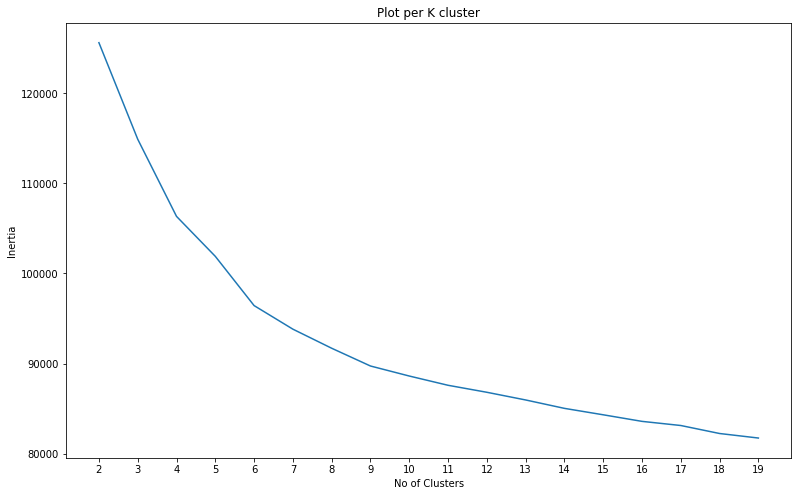

In [25]:
fig, (ax1) = plt.subplots(1, figsize=(13,8))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters)
plt.title('Plot per K cluster')
plt.xlabel('No of Clusters')
plt.ylabel('Inertia')
plt.show()

In [26]:
kmeans = KMeans(n_clusters = 5, random_state = 453)
kmeans = kmeans.fit(X_train)

predictions = kmeans.predict(X_train)

In [27]:
unique, counts = np.unique(predictions, return_counts = True)
counts = counts.reshape(1,5)

countsdf = pd.DataFrame(counts, columns = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4',])
countsdf

,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4
0,4464,2836,2178,1224,4076


The explained variance ratio is: [0.167356 0.078177]


<Figure size 432x288 with 0 Axes>

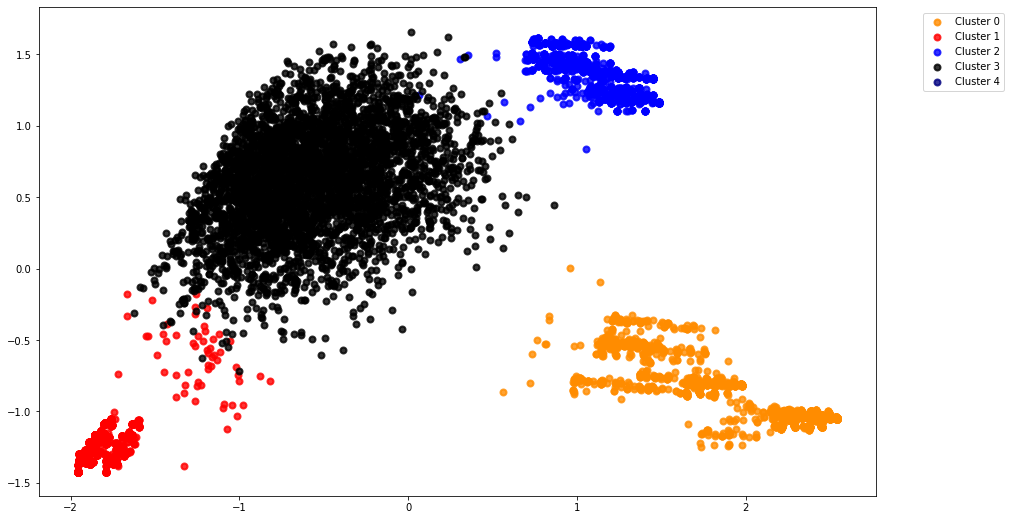

In [32]:
X = X_train
y_num = predictions

target_names = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4',]

pca = PCA(n_components = 2, random_state = 453)
X_r = pca.fit(X).transform(X)

print('The explained variance ratio is:', pca.explained_variance_ratio_)

plt.figure()
plt.figure(figsize=(15,9))
colors = ['darkorange', 'red', 'blue', 'black', 'navy']
lw = 2

for color, i, target_name in zip(colors, [1, 2, 3, 4, 5], target_names):
    plt.scatter(X_r[y_num == i, 0], X_r[y_num == i, 1], color = color, lw = lw, label = target_name, alpha = .8)
    
plt.legend(loc = 'best', shadow = True, scatterpoints = 1)    
plt.legend(bbox_to_anchor = (1.05,1), loc = 2, borderaxespad = 0.6)
plt.show()

The total variance is: 9.789277508428572
The 95% explained variance is: 9.299813633007144

The total variance explained by n_components 30 is: 7.800063287617342
The total variance explained by n_components 40 is: 8.559358189926284
The total variance explained by n_components 50 is: 9.157222065601195
The total variance explained by n_components 51 is: 9.207825714561624
The total variance explained by n_components 52 is: 9.255318460741748
The total variance explained by n_components 53 is: 9.301801997586796


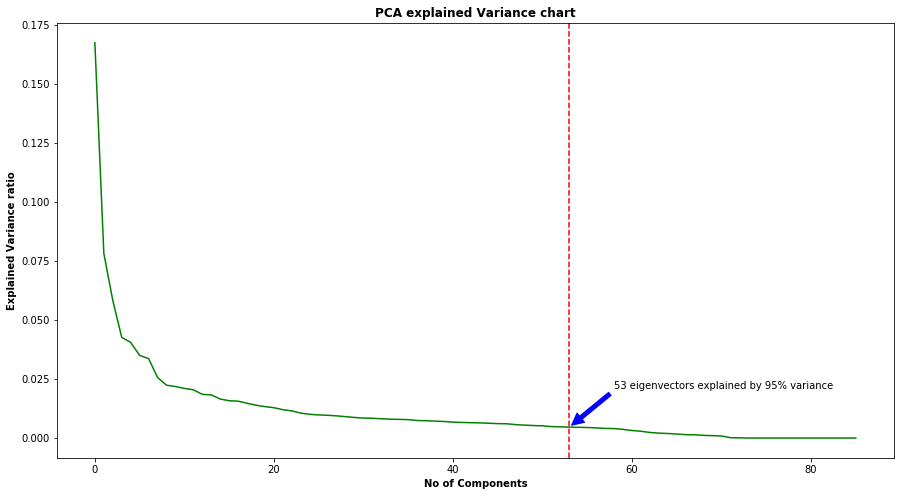

In [55]:
n_components = X.shape[1]

pca = PCA(n_components = n_components, random_state = 453)
X_r = pca.fit(X).transform(X)

total_variance = sum(pca.explained_variance_)
print('The total variance is:', total_variance)
var_95 = total_variance * 0.95
print('The 95% explained variance is:', var_95)
print('')
a = zip(range(0, n_components), pca.explained_variance_)
a  =pd.DataFrame(a, columns = ['No of Components', 'Explained Variance'])

print('The total variance explained by n_components 30 is:', sum(a['Explained Variance'][0:30]))
print('The total variance explained by n_components 40 is:', sum(a['Explained Variance'][0:40]))
print('The total variance explained by n_components 50 is:', sum(a['Explained Variance'][0:50]))
print('The total variance explained by n_components 51 is:', sum(a['Explained Variance'][0:51]))
print('The total variance explained by n_components 52 is:', sum(a['Explained Variance'][0:52]))
print('The total variance explained by n_components 53 is:', sum(a['Explained Variance'][0:53]))

plt.figure(figsize=(15,8))
plt.plot(pca.explained_variance_ratio_, color = 'green')
plt.title('PCA explained Variance chart', fontweight = 'bold')
plt.xlabel('No of Components', fontweight = 'bold')
plt.ylabel('Explained Variance ratio', fontweight = 'bold')

plt.axvline(53, label = 'no of components - 95% explained', color = 'red', linestyle = '--')
           
plt.annotate('53 eigenvectors explained by 95% variance', xy=(53, pca.explained_variance_ratio_[53]), xytext=(58, pca.explained_variance_ratio_[10]), arrowprops=dict(color = 'blue', shrink =  0.05))           

plt.show()

In [33]:
X.shape[1]

86

The inertia for 2 clusters is 118418.00533439948
The inertia for 3 clusters is 107706.74123846639
The inertia for 4 clusters is 99150.89658689543
The inertia for 5 clusters is 93688.35998579233
The inertia for 6 clusters is 89259.77886193992
The inertia for 7 clusters is 86642.30941150703
The inertia for 8 clusters is 84676.51096072514
The inertia for 9 clusters is 82842.46448863925
The inertia for 10 clusters is 81310.3327328749
The inertia for 11 clusters is 80308.07957699495
The inertia for 12 clusters is 79350.19735240041
The inertia for 13 clusters is 78775.20558800524
The inertia for 14 clusters is 78202.6463746871
The inertia for 15 clusters is 77481.72332907283
The inertia for 16 clusters is 76708.55366578116
The inertia for 17 clusters is 75954.68009892206
The inertia for 18 clusters is 75415.2073181942
The inertia for 19 clusters is 74627.86647826617


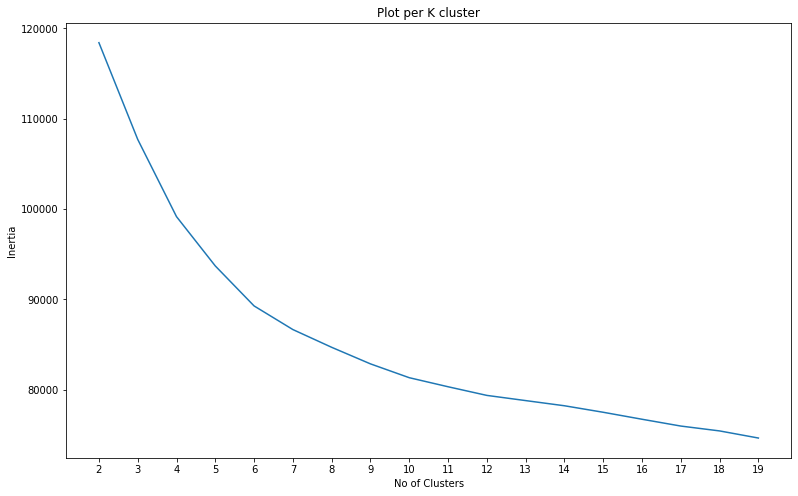

In [56]:
pca = PCA(n_components = 53, random_state = 453)
X_r = pca.fit(X).transform(X)

no_of_clusters = range(2,20)
inertia = []

for k in no_of_clusters:
    kmeans = KMeans(n_clusters = k, random_state = 453)
    kmeans = kmeans.fit(X_r)
    u = kmeans.inertia_
    inertia.append(u)
    print('The inertia for', k, 'clusters is', u)

    
fig, (ax1) = plt.subplots(1, figsize=(13,8))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters)
plt.title('Plot per K cluster')
plt.xlabel('No of Clusters')
plt.ylabel('Inertia')
plt.show()

In [57]:
new_raw_data

,Age_17 or younger,Age_18-20,Age_21-25,Age_26-32,Age_33-39,Age_40-49,Age_50-59,Age_60-64,Age_65 or older,Gender_Female,...,Would you recommend our events to other people?_Somewhat Unlikely,Would you recommend our events to other people?_Very Likely,Would you recommend our events to other people?_Very Unlikely,Did you find our events value for money?_Entirely agree,Did you find our events value for money?_Entirely disagree,Did you find our events value for money?_Mostly agree,Did you find our events value for money?_Mostly disagree,Did you find our events value for money?_Neither agree nor disagree,Did you find our events value for money?_Somewhat agree,Did you find our events value for money?_Somewhat disagree
0,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,1,0,0,...,0,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14778,0,0,0,0,0,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
14779,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
14780,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
14781,0,0,0,0,0,0,1,0,0,0,...,0,0,1,1,0,0,0,0,0,0


In [58]:
new_raw_data.columns

Index(['Age_17 or younger', 'Age_18-20', 'Age_21-25', 'Age_26-32', 'Age_33-39',
       'Age_40-49', 'Age_50-59', 'Age_60-64', 'Age_65 or older',
       'Gender_Female', 'Gender_Male', 'Current_Status_Divorced',
       'Current_Status_Living with partner',
       'Current_Status_Married with children',
       'Current_Status_Married without children', 'Current_Status_Separated',
       'Current_Status_Single, never married', 'Current_Status_Step parent',
       'Current_Status_Widowed', 'Total_Household_Income_100,000 to 149,999',
       'Total_Household_Income_150,000 to 199,999',
       'Total_Household_Income_20,000 to 34,999',
       'Total_Household_Income_200,000 or more',
       'Total_Household_Income_35,000 to 49,999',
       'Total_Household_Income_50,000 to 74,999',
       'Total_Household_Income_75,000 to 99,999',
       'Total_Household_Income_Less than 20,000',
       'How often you attend Entertaining events in a year?_1 Times a Year',
       'How often you attend Enterta

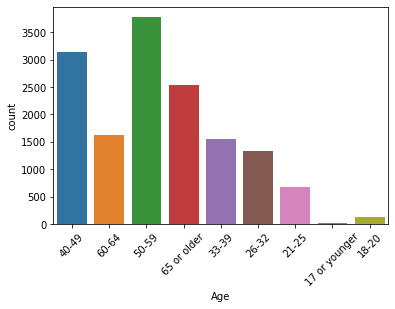

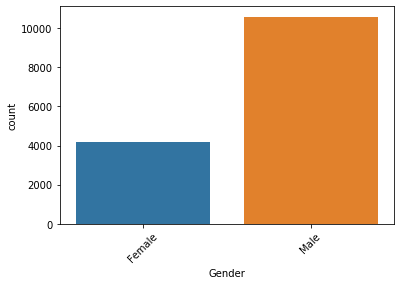

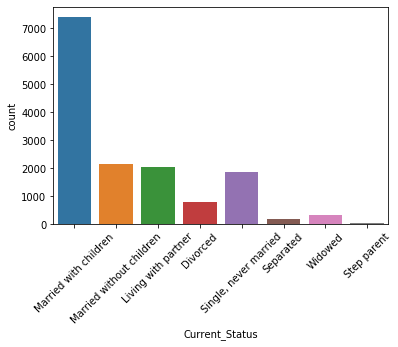

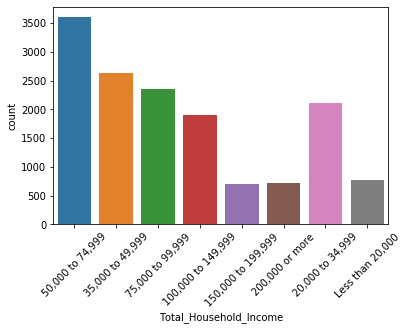

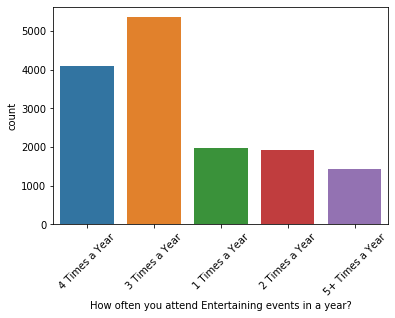

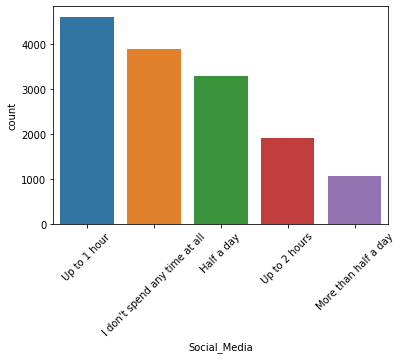

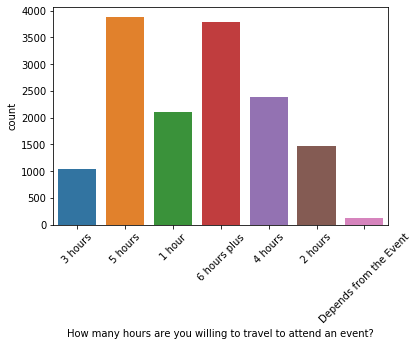

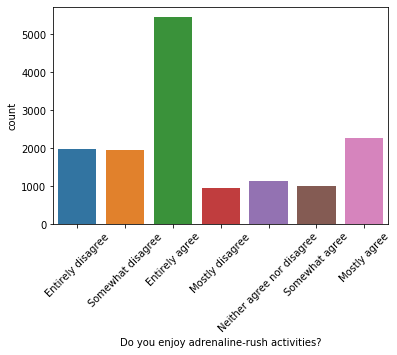

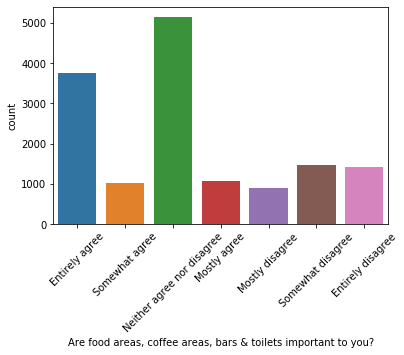

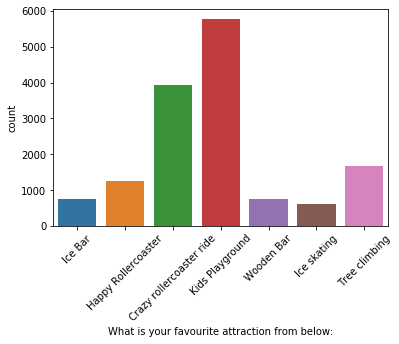

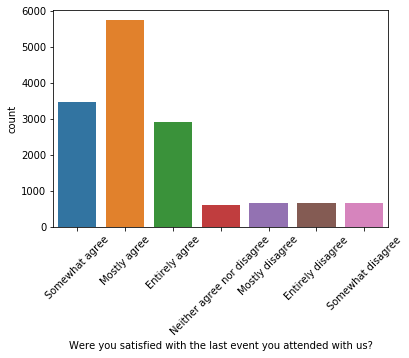

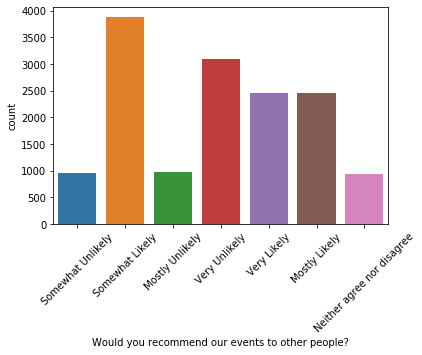

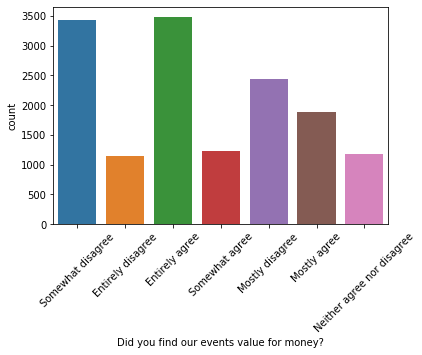

In [59]:
features = ['Age', 'Gender', 'Current_Status', 'Total_Household_Income',
       'How often you attend Entertaining events in a year?', 'Social_Media',
       'How many hours are you willing to travel to attend an event?',
       'Do you enjoy adrenaline-rush activities?',
       'Are food areas, coffee areas, bars & toilets important to you?',
       'What is your favourite attraction from below:',
       'Were you satisfied with the last event you attended with us?',
       'Would you recommend our events to other people?',
       'Did you find our events value for money?']

for f in features:
    sns.countplot(x = f, data = raw_data)
    plt.xticks(rotation = 45)
    plt.show()

In [62]:
new_raw_data['How often you attend Entertaining events in a year?_1_2 Times a Year'] = 0
new_raw_data['How often you attend Entertaining events in a year?_1_2 Times a Year'][(new_raw_data['How often you attend Entertaining events in a year?_1 Times a Year'] == 1) | (new_raw_data['How often you attend Entertaining events in a year?_2 Times a Year'] == 1)] = 1

C:\Users\ASHE\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [65]:
new_raw_data['How often you attend Entertaining events in a year?_4_5+ Times a Year'] = 0
new_raw_data['How often you attend Entertaining events in a year?_4_5+ Times a Year'][(new_raw_data['How often you attend Entertaining events in a year?_4 Times a Year'] == 1) | (new_raw_data['How often you attend Entertaining events in a year?_5+ Times a Year'] == 1)] = 1

C:\Users\ASHE\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [67]:
new_raw_data['Social_Media_Half or more a day'] = 0
new_raw_data['Social_Media_Half or more a day'][(new_raw_data['Social_Media_Half a day'] == 1) | (new_raw_data['Social_Media_More than half a day'] == 1)] = 1

C:\Users\ASHE\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [69]:
new_raw_data['How many hours are you willing to travel to attend an event?_1_or_2 hours'] = 0
new_raw_data['How many hours are you willing to travel to attend an event?_1_or_2 hours'][(new_raw_data['How often you attend Entertaining events in a year?_1 Times a Year'] == 1) | (new_raw_data['How often you attend Entertaining events in a year?_2 Times a Year'] == 1)] = 1

C:\Users\ASHE\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [71]:
new_raw_data['How many hours are you willing to travel to attend an event?_3_or_4 hours'] = 0
new_raw_data['How many hours are you willing to travel to attend an event?_3_or_4 hours'][(new_raw_data['How often you attend Entertaining events in a year?_3 Times a Year'] == 1) | (new_raw_data['How often you attend Entertaining events in a year?_4 Times a Year'] == 1)] = 1

C:\Users\ASHE\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [74]:
new_raw_data['How many hours are you willing to travel to attend an event?_5_or_6+ hours'] = 0
new_raw_data['How many hours are you willing to travel to attend an event?_5_or_6+ hours'][(new_raw_data['How many hours are you willing to travel to attend an event?_5 hours'] == 1) | (new_raw_data['How many hours are you willing to travel to attend an event?_6 hours plus'] == 1)] = 1

C:\Users\ASHE\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [79]:
new_raw_data['do_you_enjoy_adrenaline_rush_activities Mostly & Somewhat Agree'] = 0
new_raw_data['do_you_enjoy_adrenaline_rush_activities Mostly & Somewhat Agree'][(new_raw_data['Do you enjoy adrenaline-rush activities?_Somewhat agree'] == 1) | (new_raw_data['Do you enjoy adrenaline-rush activities?_Mostly agree'] == 1)] = 1




C:\Users\ASHE\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [81]:
new_raw_data['do_you_enjoy_adrenaline_rush_activities Mostly & Somewhat Disagree'] = 0
new_raw_data['do_you_enjoy_adrenaline_rush_activities Mostly & Somewhat Disagree'][(new_raw_data['Do you enjoy adrenaline-rush activities?_Mostly disagree'] == 1) | (new_raw_data['Do you enjoy adrenaline-rush activities?_Somewhat disagree'] == 1)] = 1


C:\Users\ASHE\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [83]:
new_raw_data['are_food_areas_coffee_areas_bars_toilets_important_to_you Mostly & Somewhat Agree'] = 0
new_raw_data['are_food_areas_coffee_areas_bars_toilets_important_to_you Mostly & Somewhat Agree'][(new_raw_data['Are food areas, coffee areas, bars & toilets important to you?_Mostly agree'] == 1) | (new_raw_data['Are food areas, coffee areas, bars & toilets important to you?_Somewhat agree'] == 1)] = 1

C:\Users\ASHE\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [85]:
new_raw_data['are_food_areas_coffee_areas_bars_toilets_important_to_you - Mostly & Somewhat & entirely Disagree'] = 0
new_raw_data['are_food_areas_coffee_areas_bars_toilets_important_to_you - Mostly & Somewhat & entirely Disagree'][(new_raw_data['Are food areas, coffee areas, bars & toilets important to you?_Entirely disagree'] == 1) | (new_raw_data['Are food areas, coffee areas, bars & toilets important to you?_Mostly disagree'] == 1) | (new_raw_data['Are food areas, coffee areas, bars & toilets important to you?_Somewhat disagree'] == 1)] = 1

C:\Users\ASHE\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [87]:
new_raw_data['were_you_satisfied_with_the_last_event_you_attended_with_us Entirely & Mostly & Somewhat & Neither Disagree'] = 0
new_raw_data['were_you_satisfied_with_the_last_event_you_attended_with_us Entirely & Mostly & Somewhat & Neither Disagree'][(new_raw_data['Were you satisfied with the last event you attended with us?_Entirely disagree'] == 1) | (new_raw_data['Were you satisfied with the last event you attended with us?_Mostly disagree'] == 1) | (new_raw_data['Were you satisfied with the last event you attended with us?_Somewhat disagree'] == 1) | (new_raw_data['Were you satisfied with the last event you attended with us?_Neither agree nor disagree'] == 1)] = 1

C:\Users\ASHE\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [88]:
new_raw_data['would_you_recommend_our_events_to_other_people Mostly & Somewhat & Neither Unlikely'] = 0
new_raw_data['would_you_recommend_our_events_to_other_people Mostly & Somewhat & Neither Unlikely'][(new_raw_data['Would you recommend our events to other people?_Mostly Unlikely'] == 1) | (new_raw_data['Would you recommend our events to other people?_Somewhat Unlikely'] == 1) | (new_raw_data['Would you recommend our events to other people?_Neither agree nor disagree'] == 1)] = 1

C:\Users\ASHE\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [89]:
new_raw_data['did_you_find_our_events_value_for_money Mostly & Somewhat agree'] = 0
new_raw_data['did_you_find_our_events_value_for_money Mostly & Somewhat agree'][(new_raw_data['Did you find our events value for money?_Mostly agree'] == 1) | (new_raw_data['Did you find our events value for money?_Somewhat agree'] == 1)] = 1


C:\Users\ASHE\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [90]:
new_raw_data.columns = new_raw_data.columns.str.replace("'","")

In [91]:
new_raw_data.columns

Index(['Age_17 or younger', 'Age_18-20', 'Age_21-25', 'Age_26-32', 'Age_33-39',
       'Age_40-49', 'Age_50-59', 'Age_60-64', 'Age_65 or older',
       'Gender_Female', 'Gender_Male', 'Current_Status_Divorced',
       'Current_Status_Living with partner',
       'Current_Status_Married with children',
       'Current_Status_Married without children', 'Current_Status_Separated',
       'Current_Status_Single, never married', 'Current_Status_Step parent',
       'Current_Status_Widowed', 'Total_Household_Income_100,000 to 149,999',
       'Total_Household_Income_150,000 to 199,999',
       'Total_Household_Income_20,000 to 34,999',
       'Total_Household_Income_200,000 or more',
       'Total_Household_Income_35,000 to 49,999',
       'Total_Household_Income_50,000 to 74,999',
       'Total_Household_Income_75,000 to 99,999',
       'Total_Household_Income_Less than 20,000',
       'How often you attend Entertaining events in a year?_1 Times a Year',
       'How often you attend Enterta

In [ ]:
new_features = ['Age_17 or younger', 'Age_18-20', 'Age_21-25', 'Age_26-32', 'Age_33-39',
       'Age_40-49', 'Age_50-59', 'Age_60-64', 'Age_65 or older',
       'Gender_Female', 'Gender_Male', 'Current_Status_Divorced',
       'Current_Status_Living with partner',
       'Current_Status_Married with children',
       'Current_Status_Married without children', 'Current_Status_Separated',
       'Current_Status_Single, never married', 'Current_Status_Step parent',
       'Current_Status_Widowed', 'Total_Household_Income_100,000 to 149,999',
       'Total_Household_Income_150,000 to 199,999',
       'Total_Household_Income_20,000 to 34,999',
       'Total_Household_Income_200,000 or more',
       'Total_Household_Income_35,000 to 49,999',
       'Total_Household_Income_50,000 to 74,999',
       'Total_Household_Income_75,000 to 99,999',
       'Total_Household_Income_Less than 20,000',
       #'How often you attend Entertaining events in a year?_1 Times a Year',
       #'How often you attend Entertaining events in a year?_2 Times a Year',
       'How often you attend Entertaining events in a year?_3 Times a Year',
       #'How often you attend Entertaining events in a year?_4 Times a Year',
       #'How often you attend Entertaining events in a year?_5+ Times a Year',
       #'Social_Media_Half a day', 
        'Social_Media_I dont spend any time at all',
       #'Social_Media_More than half a day',
        'Social_Media_Up to 1 hour',
       'Social_Media_Up to 2 hours',
       #'How many hours are you willing to travel to attend an event?_1 hour',
       #'How many hours are you willing to travel to attend an event?_2 hours',
       #'How many hours are you willing to travel to attend an event?_3 hours',
       #'How many hours are you willing to travel to attend an event?_4 hours',
       #'How many hours are you willing to travel to attend an event?_5 hours',
       #'How many hours are you willing to travel to attend an event?_6 hours plus',
       'How many hours are you willing to travel to attend an event?_Depends from the Event',
       'Do you enjoy adrenaline-rush activities?_Entirely agree',
       'Do you enjoy adrenaline-rush activities?_Entirely disagree',
       #'Do you enjoy adrenaline-rush activities?_Mostly agree',
       #'Do you enjoy adrenaline-rush activities?_Mostly disagree',
       'Do you enjoy adrenaline-rush activities?_Neither agree nor disagree',
       #'Do you enjoy adrenaline-rush activities?_Somewhat agree',
       #'Do you enjoy adrenaline-rush activities?_Somewhat disagree',
       'Are food areas, coffee areas, bars & toilets important to you?_Entirely agree',
       #'Are food areas, coffee areas, bars & toilets important to you?_Entirely disagree',
       #'Are food areas, coffee areas, bars & toilets important to you?_Mostly agree',
       #'Are food areas, coffee areas, bars & toilets important to you?_Mostly disagree',
       'Are food areas, coffee areas, bars & toilets important to you?_Neither agree nor disagree',
       #'Are food areas, coffee areas, bars & toilets important to you?_Somewhat agree',
       #'Are food areas, coffee areas, bars & toilets important to you?_Somewhat disagree',
       'What is your favourite attraction from below:_Crazy rollercoaster ride',
       'What is your favourite attraction from below:_Happy Rollercoaster',
       'What is your favourite attraction from below:_Ice Bar',
       'What is your favourite attraction from below:_Ice skating',
       'What is your favourite attraction from below:_Kids Playground',
       'What is your favourite attraction from below:_Tree climbing',
       'What is your favourite attraction from below:_Wooden Bar',
       'Were you satisfied with the last event you attended with us?_Entirely agree',
       #'Were you satisfied with the last event you attended with us?_Entirely disagree',
       'Were you satisfied with the last event you attended with us?_Mostly agree',
       #'Were you satisfied with the last event you attended with us?_Mostly disagree',
       #'Were you satisfied with the last event you attended with us?_Neither agree nor disagree',
       'Were you satisfied with the last event you attended with us?_Somewhat agree',
       #'Were you satisfied with the last event you attended with us?_Somewhat disagree',
       'Would you recommend our events to other people?_Mostly Likely',
       #'Would you recommend our events to other people?_Mostly Unlikely',
       #'Would you recommend our events to other people?_Neither agree nor disagree',
       'Would you recommend our events to other people?_Somewhat Likely',
       #'Would you recommend our events to other people?_Somewhat Unlikely',
       'Would you recommend our events to other people?_Very Likely',
       'Would you recommend our events to other people?_Very Unlikely',
       'Did you find our events value for money?_Entirely agree',
       'Did you find our events value for money?_Entirely disagree',
       #'Did you find our events value for money?_Mostly agree',
       'Did you find our events value for money?_Mostly disagree',
       'Did you find our events value for money?_Neither agree nor disagree',
       #'Did you find our events value for money?_Somewhat agree',
       'Did you find our events value for money?_Somewhat disagree',
       'How often you attend Entertaining events in a year?_1_2 Times a Year',
       'How often you attend Entertaining events in a year?_4_5+ Times a Year',
       'Social_Media_Half or more a day',
       'How many hours are you willing to travel to attend an event?_1_or_2 hours',
       'How many hours are you willing to travel to attend an event?_3_or_4 hours',
       'How many hours are you willing to travel to attend an event?_5_or_6+ hours',
       'do_you_enjoy_adrenaline_rush_activities Mostly & Somewhat Agree',
       'do_you_enjoy_adrenaline_rush_activities Mostly & Somewhat Disagree',
       'are_food_areas_coffee_areas_bars_toilets_important_to_you Mostly & Somewhat Agree',
       'are_food_areas_coffee_areas_bars_toilets_important_to_you - Mostly & Somewhat & entirely Disagree',
       'were_you_satisfied_with_the_last_event_you_attended_with_us Entirely & Mostly & Somewhat & Neither Disagree',
       'would_you_recommend_our_events_to_other_people Mostly & Somewhat & Neither Unlikely',
       'did_you_find_our_events_value_for_money Mostly & Somewhat agree']

In [29]:

<!DOCTYPE html>
<html >
<!--From https://codepen.io/frytyler/pen/EGdtg-->
<head>
  <meta charset="UTF-8">
  <title>ML API</title>
  <link href='https://fonts.googleapis.com/css?family=Pacifico' rel='stylesheet' type='text/css'>
<link href='https://fonts.googleapis.com/css?family=Arimo' rel='stylesheet' type='text/css'>
<link href='https://fonts.googleapis.com/css?family=Hind:300' rel='stylesheet' type='text/css'>
<link href='https://fonts.googleapis.com/css?family=Open+Sans+Condensed:300' rel='stylesheet' type='text/css'>
<link rel="stylesheet" href="{{ url_for('static', filename='css/style.css') }}">
  
</head>

<body>
 <div class="login">
	<h1>Predict Salary Analysis</h1>

<!-- Main Input For Receiving Query to our ML -->
    <form action="{{ url_for('predict')}}"method="post">
    	<input type="text" name="experience" placeholder="Experience" required="required" />
        <input type="text" name="test_score" placeholder="Test Score" required="required" />
		<input type="text" name="interview_score" placeholder="Interview Score" required="required" />

        <button type="submit" class="btn btn-primary btn-block btn-large">Predict</button>
    </form>

   <br>
   <br>
   {{ prediction_text }}

 </div>


</body>
</html>

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 28)

In [31]:
import requests

url = 'http://localhost:5000/predict_api'
r = requests.post(url,json={'experience':2, 'test_score':9, 'interview_score':6})

print(r.json())

ConnectionError: HTTPConnectionPool(host='localhost', port=5000): Max retries exceeded with url: /predict_api (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x0000023E941F6108>: Failed to establish a new connection: [WinError 10061] No connection could be made because the target machine actively refused it'))

In [6]:
dataset = pd.read_csv('C:\\Users\ASHE\\Documents\\Test score.csv')
dataset

,experience,test_score,interview_score,salary
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [7]:
import pickle

In [8]:
dataset['experience'].fillna(0, inplace=True)

dataset['test_score'].fillna(dataset['test_score'].mean(), inplace=True)

X = dataset.iloc[:, :3]

In [9]:
X

,experience,test_score,interview_score
0,0,8.000000,9
1,0,8.000000,6
2,five,6.000000,7
3,two,10.000000,10
4,seven,9.000000,6
5,three,7.000000,10
6,ten,7.857143,7
7,eleven,7.000000,8


In [10]:
def convert_to_int(word):
    word_dict = {'one':1, 'two':2, 'three':3, 'four':4, 'five':5, 'six':6, 'seven':7, 'eight':8,
                'nine':9, 'ten':10, 'eleven':11, 'twelve':12, 'zero':0, 0: 0}
    return word_dict[word]

In [11]:
X['experience'] = X['experience'].apply(lambda x : convert_to_int(x))

y = dataset.iloc[:, -1]


In [13]:
y

0    50000
1    45000
2    60000
3    65000
4    70000
5    62000
6    72000
7    80000
Name: salary, dtype: int64

In [14]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

#Fitting model with trainig data
regressor.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
pickle.dump(regressor, open('model.pkl','wb'))

# Loading model to compare the results
model = pickle.load(open('model.pkl','rb'))
print(model.predict([[2, 9, 6]]))

[53290.892559]


In [16]:
import numpy as np
from flask import Flask, request, jsonify, render_template
import pickle

In [17]:
app = Flask(__name__)
model = pickle.load(open('model.pkl', 'rb'))

In [18]:
@app.route('/')
def home():
    return render_template('index.html')

In [19]:
@app.route('/predict',methods=['POST'])
def predict():
    '''
    For rendering results on HTML GUI
    '''
    int_features = [int(x) for x in request.form.values()]
    final_features = [np.array(int_features)]
    prediction = model.predict(final_features)

    output = round(prediction[0], 2)

    return render_template('index.html', prediction_text='Employee Salary should be $ {}'.format(output))


In [20]:
@app.route('/predict_api',methods=['POST'])
def predict_api():
    '''
    For direct API calls trought request
    '''
    data = request.get_json(force=True)
    prediction = model.predict([np.array(list(data.values()))])

    output = prediction[0]
    return jsonify(output)

In [21]:
if __name__ == "__main__":
    app.run(debug=True)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Restarting with windowsapi reloader


SystemExit: 1

C:\Users\ASHE\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3339: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [12]:
import pickle


In [4]:
data = pd.read_csv('C:\\Users\ASHE\\Documents\\Python\\Forest_Fire.csv')
data = np.array(data)

In [5]:
X = data[1:, 1:-1]
y = data[1:, -1]
y = y.astype('int')
X = X.astype('int')

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [9]:
log_reg = LogisticRegression()

In [10]:
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
pickle.dump(log_reg, open('model.pkl', 'wb'))
model=pickle.load(open('model.pkl','rb'))

In [14]:
from flask import Flask,request, url_for, redirect, render_template
import pickle
import numpy as np

app = Flask(__name__)

model=pickle.load(open('model.pkl','rb'))


@app.route('/')
def hello_world():
    return render_template("forest_fire.html")


@app.route('/predict',methods=['POST','GET'])
def predict():
    int_features=[int(x) for x in request.form.values()]
    final=[np.array(int_features)]
    print(int_features)
    print(final)
    prediction=model.predict_proba(final)
    output='{0:.{1}f}'.format(prediction[0][1], 2)

    if output>str(0.5):
        return render_template('forest_fire.html',pred='Your Forest is in Danger.\nProbability of fire occuring is {}'.format(output),bhai="kuch karna hain iska ab?")
    else:
        return render_template('forest_fire.html',pred='Your Forest is safe.\n Probability of fire occuring is {}'.format(output),bhai="Your Forest is Safe for now")


if __name__ == '__main__':
    app.run(debug=True)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Restarting with windowsapi reloader


SystemExit: 1

C:\Users\ASHE\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3339: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
